In [33]:
import torch
import pandas as pd
import numpy as np
#import random
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold,StratifiedKFold 
import gc
import os
from os import path
from sys import path as systemPath
systemPath.append(path.join('..', '..'))
from scipy.spatial import distance_matrix
#import argparse
import random
import matplotlib.pyplot as plt
import networkx as nx
import MDAnalysis as mda
from matplotlib.ticker import MaxNLocator,MultipleLocator
from MDAnalysis.core.groups import AtomGroup
import seaborn as sns

In [34]:
mutation_pos = [29, 29, 35, 35, 35, 41, 41, 50, 59, 62, 77, 86, 89, 92, 92, 95, 101, 101, 104, 107, 107, 110, 113, 113, 119, 119, 122, 122, 137, 137, 143, 143, 149, 149, 152, 161, 164, 164, 170, 170, 176, 176, 188, 191, 191, 194, 203, 203, 206, 209, 215, 218, 218, 221, 221, 227, 227, 227, 230, 233, 236, 236, 236, 239, 239, 242, 242, 245, 245, 248, 251, 260, 260, 263, 266, 269, 272, 293, 299, 302, 302, 314, 320, 329, 341, 365, 365, 368, 368, 371, 371, 392, 398, 398, 398, 404, 407, 425, 425, 431, 431, 431, 455, 464, 464, 467, 473, 476, 488, 494, 497, 524, 527, 539, 539, 542, 542, 557, 557, 566, 575, 575, 581, 581, 593, 596, 602, 605, 608, 611, 614, 617, 626, 626, 647, 653, 653, 659, 659, 662, 671, 674, 677, 680, 680, 683, 689, 692, 695, 698, 704, 704, 707, 713, 716, 725, 734, 755, 764, 782, 785, 788, 800, 812, 818, 839, 848, 860, 860, 860, 863, 866, 878, 884, 884, 887, 890, 896, 899, 899, 902, 914, 914, 917, 920, 923, 926, 929, 938, 944, 962, 980, 983, 983, 989, 989, 992, 1004, 1007, 1007, 1010, 1013, 1013, 1016, 1019, 1022, 1025, 116, 1028, 125, 131, 158, 164, 32, 32, 32, 179, 182, 191, 200, 35, 206, 206, 212, 218, 227, 38, 242, 41, 275, 275, 293, 308, 308, 329, 347, 50, 365, 374, 53, 386, 407, 410, 56, 416, 419, 431, 440, 443, 59, 59, 59, 452, 470, 473, 485, 506, 521, 524, 551, 560, 569, 572, 578, 581, 587, 596, 599, 602, 608, 662, 662, 665, 671, 671, 677, 686, 689, 692, 692, 701, 704, 86, 716, 719, 722, 734, 770, 812, 812, 815, 854, 101, 878, 893, 917, 932, 947, 971, 113, 995, 1091, 1097, 1103, 1106, 1139, 1163, 1166, 1166, 1175, 1175, 1184, 1190, 1220, 1226, 1229, 1229, 1238, 1247, 1247, 1253, 1259, 1259, 1262, 1262, 1268, 1271, 1280, 1283, 1289, 1295, 1298, 1301, 1301, 1301, 1304, 1304, 1307, 1310, 1310, 1310, 1310, 1313, 1313, 1319, 1319, 1322, 1322, 1331, 1331, 1337, 1340, 1343, 1343, 1349, 1349, 1358, 1361, 1364, 1364, 1379, 1382, 1391, 1391, 1397, 1400, 1406, 1418, 1421, 1427, 1433, 1442, 1451, 1451, 1457, 1457, 1463, 1466, 1472, 1481, 1484, 1484, 1484, 1490, 1493, 1499, 1499, 1502, 1505, 1514, 1517, 1517, 1520, 1526, 1535, 1559, 1565, 1568, 1568, 1571, 1574, 1574, 1589, 1601, 1607, 1610, 1613, 1619, 1634, 1634, 1637, 1643, 1649, 1649, 1649, 1655, 1673, 1673, 1685, 1685, 1688, 1691, 1694, 1703, 1709, 1712, 1718, 1724, 1730, 1736, 1739, 1739, 1742, 1745, 1751, 1757, 1757, 1760, 1763, 1766, 1769, 1769, 1778, 1802, 1808, 1820, 1826, 1832, 1850, 1853, 1865, 1868, 1874, 1877, 1889, 1910, 1919, 1922, 1928, 1928, 1943, 1946, 1946, 1955, 1961, 1970, 1979, 1985, 1988, 2000, 2000, 2009, 2012, 2015, 2024, 2030, 2039, 2051, 2054, 2057]


# mutation type
mutation_name = [ "ALA", "ASP", "CYS", "SER", "ASP", "ARG", "VAL", "ARG", "CYS", "CYS", "ASP", "ARG", "CYS", "ARG", "GLU", "ARG", "ARG", "VAL", "GLU", "SER", "VAL", "CYS", "ARG", "ASP", "SER", "ASP", "SER", "ALA", "ARG", "ASP", "SER", "ARG", "ARG", "ASP", "ARG", "GLU", "ARG", "ASP", "ARG", "ALA", "CYS", "SER", "ARG", "CYS", "SER", "CYS", "VAL", "ALA", "SER", "SER", "ALA", "CYS", "VAL", "CYS", "SER", "ARG", "CYS", "SER", "GLU", "SER", "CYS", "ALA", "ASP", "CYS", "ASP", "CYS", "SER", "SER", "CYS", "SER", "ALA", "CYS", "ALA", "SER", "CYS", "VAL", "VAL", "CYS", "SER", "ARG", "GLU", "ARG", "ALA", "CYS", "CYS", "CYS", "ALA", "CYS", "SER", "CYS", "ASP", "ALA", "ARG", "SER", "CYS", "ARG", "ARG", "SER", "ALA", "CYS", "SER", "ASP", "ARG", "CYS", "SER", "SER", "ARG", "VAL", "ARG", "SER", "ALA", "VAL", "SER", "CYS", "SER", "CYS", "SER", "SER", "ASP", "ARG", "CYS", "ASP", "SER", "VAL", "SER", "CYS", "VAL", "SER", "CYS", "SER", "SER", "SER", "CYS", "SER", "SER", "VAL", "ALA", "SER", "ARG", "CYS", "ALA", "ALA", "SER", "ARG", "ASP", "ARG", "ASP", "SER", "CYS", "ALA", "CYS", "SER", "CYS", "SER", "SER", "SER", "CYS", "GLU", "CYS", "CYS", "CYS", "ARG", "ASP", "ARG", "VAL", "CYS", "SER", "SER", "ALA", "VAL", "ARG", "SER", "SER", "SER", "CYS", "SER", "SER", "SER", "SER", "ASP", "ALA", "SER", "CYS", "SER", "CYS", "SER", "ALA", "SER", "ASP", "ALA", "CYS", "SER", "CYS", "ASP", "SER", "VAL", "ARG", "CYS", "SER", "CYS", "ASP", "CYS", "SER", "VAL", "SER", "VAL", "VAL", "GLU", "ASP", "SER", "VAL", "VAL", "SER", "ARG", "SER", "ALA", "CYS", "ASP", "ASP", "SER", "ARG", "VAL", "ASP", "ALA", "SER", "ALA", "VAL", "ALA", "SER", "CYS", "ASP", "ASP", "VAL", "ALA", "SER", "VAL", "GLU", "ASP", "ARG", "ARG", "ALA", "ASP", "ARG", "ASP", "SER", "ARG", "VAL", "ARG", "ASP", "ARG", "ASP", "SER", "ARG", "SER", "SER", "SER", "SER", "SER", "ALA", "SER", "SER", "VAL", "VAL", "ARG", "ASP", "SER", "SER", "ASP", "SER", "SER", "ARG", "ALA", "ASP", "ASP", "VAL", "ASP", "ARG", "VAL", "ARG", "VAL", "VAL", "ALA", "GLU", "ASP", "VAL", "SER", "ASP", "ASP", "ASP", "ALA", "ASP", "ARG", "GLU", "ARG", "ASP", "ARG", "SER", "SER", "ALA", "SER", "ASP", "ASP", "ASP", "ASP", "SER", "VAL", "VAL", "SER", "ASP", "ARG", "ASP", "ASP", "VAL", "ASP", "ASP", "ASP", "VAL", "ASP", "ASP", "VAL", "SER", "ALA", "VAL", "ALA", "VAL", "VAL", "ARG", "ASP", "ARG", "ARG", "SER", "GLU", "SER", "CYS", "ASP", "ASP", "VAL", "SER", "CYS", "SER", "ARG", "PRO", "ARG", "SER", "CYS", "SER", "SER", "CYS", "CYS", "SER", "SER", "TRP", "SER", "ALA", "ASP", "VAL", "GLU", "VAL", "CYS", "SER", "SER", "VAL", "SER", "ASP", "SER", "SER", "GLU", "ARG", "GLU", "CYS", "SER", "ALA", "ASP", "VAL", "VAL", "GLU", "GLU", "GLU", "VAL", "ASP", "SER", "ASP", "VAL", "ARG", "SER", "ARG", "GLU", "CYS", "GLU", "CYS", "SER", "VAL", "ARG", "ASP", "CYS", "ARG", "SER", "CYS", "SER", "VAL", "SER", "ASP", "SER", "ARG", "VAL", "ASP", "GLU", "VAL", "SER", "VAL", "ASP", "ASP", "ARG", "VAL", "ASP", "ASP", "CYS", "ASP", "SER", "ASP", "ASP", "SER", "SER", "CYS", "CYS", "ARG", "GLU", "SER", "VAL", "VAL", "SER", "VAL", "VAL", "SER", "SER", "ARG", "SER", "CYS", "ASP", "ARG", "SER", "ALA", "CYS", "SER", "SER", "ARG", "VAL", "SER", "CYS", "SER", "ASP", "ASP", "SER", "ARG", "ARG", "CYS", "ARG", "SER", "SER", "CYS", "ASP", "VAL", "ASP", "VAL", "VAL", "ASP", "SER", "SER", "ARG", "ARG", "GLU", "ARG", "ASP", "SER", "SER", "CYS", "ASP", "ASP", "VAL", "VAL", "CYS", "ALA", "ARG", "ARG", "SER", "ASP", "VAL", "GLU", "ASP", "VAL", "ASP", "ARG", "ASP", "ASP", "VAL", "CYS", "VAL", "GLU", "ARG", "SER", "ARG", "ARG", "GLU", "ARG", "ARG", "ARG", "ASP", "SER", "CYS", "SER", "VAL", "CYS", "SER", "ARG", "ASP", "ARG", "ASP", "ASP", "GLU", "ARG", "GLU", "ASP", "ARG", "ARG", "SER", "ALA", "ASP", "SER", "ASP", "SER", "VAL", "SER", "ASP", "ARG", "VAL", "ASP", "ASP", "CYS", "ASP", "CYS", "ASP", "ARG", "VAL", "SER", "CYS", "GLU", "ARG", "VAL", "CYS", "GLU", "ASP", "CYS", "VAL", "ASP", "ALA", "CYS", "SER", "VAL", "ARG", "ALA", "GLU", "VAL", "SER", "CYS", "SER", "SER", "ASP", "VAL", "ASP", "GLU", "ASP", "ASP", "GLU", "ARG", "ASP", "ASP", "ASP", "SER", "ARG", "SER", "VAL", "ASP", "ASP", "ARG", "ASP", "ASP", "CYS"]
# lethal:0, non-lethal:1 
lethal = [ 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1]  
# triple number 
triplet_number =  [ 5, 5, 7, 7, 7, 9, 9, 12, 15, 16, 21, 24, 25, 26, 26, 27, 29, 29, 30, 31, 31, 32, 33, 33, 35, 35, 36, 36, 41, 41, 43, 43, 45, 45, 46, 49, 50, 50, 52, 52, 54, 54, 58, 59, 59, 60, 63, 63, 64, 65, 67, 68, 68, 69, 69, 71, 71, 71, 72, 73, 74, 74, 74, 75, 75, 76, 76, 77, 77, 78, 79, 82, 82, 83, 84, 85, 86, 93, 95, 96, 96, 100, 102, 105, 109, 117, 117, 118, 118, 119, 119, 126, 128, 128, 128, 130, 131, 137, 137, 139, 139, 139, 147, 150, 150, 151, 153, 154, 158, 160, 161, 170, 171, 175, 175, 176, 176, 181, 181, 184, 187, 187, 189, 189, 193, 194, 196, 197, 198, 199, 200, 201, 204, 204, 211, 213, 213, 215, 215, 216, 219, 220, 221, 222, 222, 223, 225, 226, 227, 228, 230, 230, 231, 233, 234, 237, 240, 247, 250, 256, 257, 258, 262, 266, 268, 275, 278, 282, 282, 282, 283, 284, 288, 290, 290, 291, 292, 294, 295, 295, 296, 300, 300, 301, 302, 303, 304, 305, 308, 310, 316, 322, 323, 323, 325, 325, 326, 330, 331, 331, 332, 333, 333, 334, 335, 336, 337, 34, 338, 37, 39, 48, 50, 6, 6, 6, 55, 56, 59, 62, 7, 64, 64, 66, 68, 71, 8, 76, 9, 87, 87, 93, 98, 98, 105, 111, 12, 117, 120, 13, 124, 131, 132, 14, 134, 135, 139, 142, 143, 15, 15, 15, 146, 152, 153, 157, 164, 169, 170, 179, 182, 185, 186, 188, 189, 191, 194, 195, 196, 198, 216, 216, 217, 219, 219, 221, 224, 225, 226, 226, 229, 230, 24, 234, 235, 236, 240, 252, 266, 266, 267, 280, 29, 288, 293, 301, 306, 311, 319, 33, 327, 10, 12, 14, 15, 26, 34, 35, 35, 38, 38, 41, 43, 53, 55, 56, 56, 59, 62, 62, 64, 66, 66, 67, 67, 69, 70, 73, 74, 76, 78, 79, 80, 80, 80, 81, 81, 82, 83, 83, 83, 83, 84, 84, 86, 86, 87, 87, 90, 90, 92, 93, 94, 94, 96, 96, 99, 100, 101, 101, 106, 107, 110, 110, 112, 113, 115, 119, 120, 122, 124, 127, 130, 130, 132, 132, 134, 135, 137, 140, 141, 141, 141, 143, 144, 146, 146, 147, 148, 151, 152, 152, 153, 155, 158, 166, 168, 169, 169, 170, 171, 171, 176, 180, 182, 183, 184, 186, 191, 191, 192, 194, 196, 196, 196, 198, 204, 204, 208, 208, 209, 210, 211, 214, 216, 217, 219, 221, 223, 225, 226, 226, 227, 228, 230, 232, 232, 233, 234, 235, 236, 236, 239, 247, 249, 253, 255, 257, 263, 264, 268, 269, 271, 272, 276, 283, 286, 287, 289, 289, 294, 295, 295, 298, 300, 303, 306, 308, 309, 313, 313, 316, 317, 318, 321, 323, 326, 330, 331, 332, 334, 336, 337, 338, 338, 338, 338, 34, 334, 334, 335, 35, 36, 37, 37, 37, 41, 43, 53, 57, 59, 60, 60, 61, 63, 65, 67, 67, 72, 72, 8, 75, 76, 77, 83, 9, 84, 88, 89, 99, 103, 11, 104, 118, 121, 122, 13, 131, 143, 154, 158, 159, 160, 161, 17, 179, 182, 186, 191, 191, 195, 204, 207, 209, 215, 217, 219, 220, 222, 224, 225, 227, 228, 233, 234, 236, 238, 238, 239, 241, 242, 243, 244, 245, 251, 253, 255, 256, 262, 27, 264, 282, 285, 285, 289, 291, 298, 298, 299, 299, 301, 302, 305, 312, 314, 319, 332]
# chain 
alpha12 = [ 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]



In [35]:
"amino acids clusters"
PRO = ["PRO","HYP"]
Small = ["GLY","ALA","CYS","SER","THR"]
Charged = ["HIS", "LYS", "ARG", "GLU","ASP"]
Hydrophobic = ["VAL", "ILE", "LEU", "MET", "PHE", "TYR" , "TRP"]
Polar = ["ASN" , "GLN"]
severe = ["VAL","ASP"]
moderate = ["GLU","CYS","ARG"]
mild = ["PRO","TRP","ALA","SER"]


In [36]:
rad_71 = [[] for _ in range(9)]
unhei_71 = [[] for _ in range(9)]
rad_wt = [[] for _ in range(9)]
unhei_wt = [[] for _ in range(9)]
imform = []
leth = []
for tri_pos,type,a12,l in zip(triplet_number,mutation_name,alpha12,lethal):
    if tri_pos == 139 and a12==1:
        imform.append(f"{tri_pos}_{type}_{a12}")
        leth.append(l)
        x1 = 3*(tri_pos-1)+17
        x1_values = [x1 + i for i in range(-12, 13, 3)]
        x2 = 3*(tri_pos-1)+1054+10
        x2_values = [x2 + i for i in range(-12, 13, 3)]
        x3 = 3*(tri_pos-1)+17+2080
        x3_values = [x3 + i for i in range(-12, 13, 3)]
        file_pdb = f"../../dataset/structure/alpha{a12}_structure/{tri_pos}_{type}_{a12}.pdb"
        u1 = mda.Universe(file_pdb)
        u1.trajectory[0]
        # atoms = u1.select_atoms("name CA")
        # mutation
        alpha1_1_mu = u1.select_atoms(f"segid 0A and resid {x1}")
        alpha2_mu = u1.select_atoms(f"segid 0B and resid {x2}")   
        alpha1_2_mu= u1.select_atoms(f"segid 0C and resid {x3}")
        if a12 == 1:
            if alpha1_1_mu.resnames[0]!=type or alpha1_2_mu.resnames[0]!=type:
                print(f"{tri_pos}_{type}_{a12}")
                # raise Exception(f"{tri_pos}_{type}_{a12}")
            if alpha2_mu.resnames[0]!="GLY" :
                print(f"{tri_pos}_{type}_{a12}")
                # raise Exception(f"{tri_pos}_{type}_{a12}")
        if a12 == 2:    
            if alpha2_mu.resnames[0]!=type :
                print(f"{tri_pos}_{type}_{a12}")
                # raise Exception(f"{tri_pos}_{type}_{a12}")
            if alpha1_1_mu.resnames[0]!="GLY" or alpha1_2_mu.resnames[0]!="GLY":
                print(f"{tri_pos}_{type}_{a12}")
        for i, (x1, x2, x3) in enumerate(zip(x1_values, x2_values, x3_values)):
            alpha1_1_mu = u1.select_atoms(f"segid 0A and resid {x1}")
            alpha2_mu = u1.select_atoms(f"segid 0B and resid {x2}")   
            alpha1_2_mu= u1.select_atoms(f"segid 0C and resid {x3}")
            alpha1_1_center_mu = alpha1_1_mu.center_of_geometry()
            alpha2_center_mu = alpha2_mu.center_of_geometry()
            alpha1_2_center_mu = alpha1_2_mu.center_of_geometry()
            combined_atoms_mu = AtomGroup(alpha1_1_mu + alpha2_mu + alpha1_2_mu)
            combined_center_mu = combined_atoms_mu.center_of_geometry()
            distances_mu = [
            np.linalg.norm(alpha1_1_center_mu - combined_center_mu),
            np.linalg.norm(alpha2_center_mu - combined_center_mu),
            np.linalg.norm(alpha1_2_center_mu - combined_center_mu)
            ]
            average_distance_mu = np.mean(distances_mu)
            rad_71[i].append(average_distance_mu)
u_wt = mda.Universe("../../dataset/structure/collagen_wt.pdb")
u_wt.trajectory[0]
print(imform)
for i, (x1, x2, x3) in enumerate(zip(x1_values, x2_values, x3_values)):
    # wild type
    alpha1_1_wt = u_wt.select_atoms(f"segid 0A and resid {x1}")
    alpha2_wt = u_wt.select_atoms(f"segid 0B and resid {x2}")   
    alpha1_2_wt= u_wt.select_atoms(f"segid 0C and resid {x3}")
    alpha1_1_center_wt = alpha1_1_wt.center_of_geometry()
    alpha2_center_wt = alpha2_wt.center_of_geometry()
    alpha1_2_center_wt = alpha1_2_wt.center_of_geometry()
    combined_atoms_wt = AtomGroup(alpha1_1_wt + alpha2_wt + alpha1_2_wt)
    combined_center_wt = combined_atoms_wt.center_of_geometry()
    distances_wt = [
    np.linalg.norm(alpha1_1_center_wt - combined_center_wt),
    np.linalg.norm(alpha2_center_wt - combined_center_wt),
    np.linalg.norm(alpha1_2_center_wt - combined_center_wt)
    ]
    average_distance_wt = np.mean(distances_wt)
    print(i)
    rad_wt[i].append(average_distance_wt)
print(rad_71)
print(rad_wt)
# raise
u_wt = mda.Universe("../../dataset/structure/collagen_wt.pdb")
u_wt.trajectory[0]
for tri_pos,type,a12,l in zip(triplet_number,mutation_name,alpha12,lethal):
    if tri_pos == 139 and a12==1:
        x1 = 3*(tri_pos-1)+17
        x1_values = [x1 + i for i in range(-12, 16, 3)]
        x2 = 3*(tri_pos-1)+1054+10
        x2_values = [x2 + i for i in range(-12, 16, 3)]
        x3 = 3*(tri_pos-1)+17+2080
        x3_values = [x3 + i for i in range(-12, 16, 3)]
        file_pdb = f"../../dataset/structure/alpha{a12}_structure/{tri_pos}_{type}_{a12}.pdb"
        u1 = mda.Universe(file_pdb)
        u1.trajectory[0]
        atoms = u1.select_atoms("name CA")
        alpha1_1_mu = u1.select_atoms(f"segid 0A and resid {x1}")
        alpha2_mu = u1.select_atoms(f"segid 0B and resid {x2}")   
        alpha1_2_mu= u1.select_atoms(f"segid 0C and resid {x3}")
        if a12 == 1:
            if alpha1_1_mu.resnames[0]!=type or alpha1_2_mu.resnames[0]!=type:
                print(f"{tri_pos}_{type}_{a12}")
                # raise Exception(f"{tri_pos}_{type}_{a12}")
            if alpha2_mu.resnames[0]!="GLY" :
                print(f"{tri_pos}_{type}_{a12}")
                # raise Exception(f"{tri_pos}_{type}_{a12}")
        if a12 == 2:    
            if alpha2_mu.resnames[0]!=type :
                print(f"{tri_pos}_{type}_{a12}")
                # raise Exception(f"{tri_pos}_{type}_{a12}")
            if alpha1_1_mu.resnames[0]!="GLY" or alpha1_2_mu.resnames[0]!="GLY":
                print(f"{tri_pos}_{type}_{a12}")
        unit_mass_center_mu = []
        unit_mass_center_wt = []
        for i, (x1, x2, x3) in enumerate(zip(x1_values, x2_values, x3_values)):
            alpha1_1_mu = u1.select_atoms(f"segid 0A and resid {x1}")
            alpha2_mu = u1.select_atoms(f"segid 0B and resid {x2}")   
            alpha1_2_mu= u1.select_atoms(f"segid 0C and resid {x3}")
            alpha1_1_center_mu = alpha1_1_mu.center_of_geometry()
            alpha2_center_mu = alpha2_mu.center_of_geometry()
            alpha1_2_center_mu = alpha1_2_mu.center_of_geometry()
            combined_atoms_mu = AtomGroup(alpha1_1_mu + alpha2_mu + alpha1_2_mu)
            combined_center_mu = combined_atoms_mu.center_of_geometry()
            unit_mass_center_mu.append(combined_center_mu)
        for i in range(len(unit_mass_center_mu) - 1):
            distance_mu = np.linalg.norm(unit_mass_center_mu[i] - unit_mass_center_mu[i + 1])
            unhei_71[i].append(distance_mu)
for i, (x1, x2, x3) in enumerate(zip(x1_values, x2_values, x3_values)): 
    # wild type
    alpha1_1_wt = u_wt.select_atoms(f"segid 0A and resid {x1}")
    alpha2_wt = u_wt.select_atoms(f"segid 0B and resid {x2}")   
    alpha1_2_wt= u_wt.select_atoms(f"segid 0C and resid {x3}")
    alpha1_1_center_wt = alpha1_1_wt.center_of_geometry()
    alpha2_center_wt = alpha2_wt.center_of_geometry()
    alpha1_2_center_wt = alpha1_2_wt.center_of_geometry()
    combined_atoms_wt = AtomGroup(alpha1_1_wt + alpha2_wt + alpha1_2_wt)
    combined_center_wt = combined_atoms_wt.center_of_geometry()
    unit_mass_center_wt.append(combined_center_wt)
for i in range(len(unit_mass_center_mu) - 1):
    distance_wt = np.linalg.norm(unit_mass_center_wt[i] - unit_mass_center_wt[i + 1])
    unhei_wt[i].append(distance_wt)

['139_CYS_1', '139_SER_1', '139_ASP_1', '139_VAL_1']
0
1
2
3
4
5
6
7
8
[[7.024522847665156, 7.420952870946198, 7.061687964724956, 7.032239629207762], [5.606979441762504, 4.979206934559738, 5.290416798021679, 4.482500717079161], [3.7284480114294904, 3.0273941828288025, 5.657783611880299, 3.5502934548298826], [4.2126612501581375, 4.247892607765466, 3.8047635645517945, 3.811397452758753], [5.180098771318742, 5.6284007964912135, 4.84981805651995, 5.726708775487389], [5.2140337527760146, 5.646364533778063, 5.717493303544394, 5.38273894720992], [3.4591133256926287, 4.156423577373588, 3.9920523884652788, 3.8149577771755148], [3.404535424618933, 4.072509130562451, 3.2511108371877455, 3.2953386512053373], [3.7870592118452193, 3.6509841927430657, 3.538513411660515, 3.1610834946969657]]
[[7.4602474035771245], [5.507880132943069], [4.699975073640171], [4.4753098759915275], [5.407108430274753], [6.046233415702633], [3.66844651917696], [3.2107073200874314], [3.3320595499389083]]


[-0.97152706]
[-1.67258089]
[0.95780854]
[-1.14968162]


Text(0, 0.5, 'Radius(Å)')

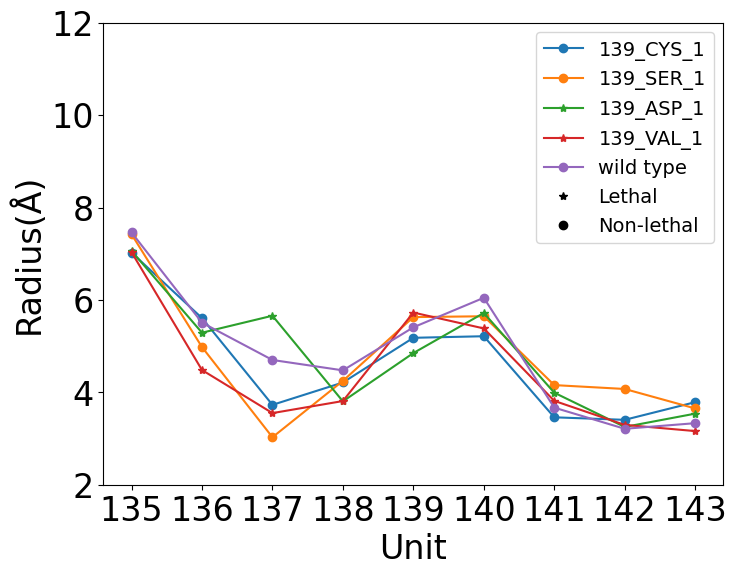

In [37]:
columns = list(zip(*rad_71))
# print(columns[0][3]-rad_wt[3])
# print(columns[0][4]-columns[0][5])
print(columns[0][2]-rad_wt[2])
print(columns[1][2]-rad_wt[2])
print(columns[2][2]-rad_wt[2])
print(columns[3][2]-rad_wt[2])
plt.figure(figsize=(8,6))
plt.ylim(2,12)
# xlabel=[67,68,69,70,71,72,73,74,75]
xlabel = [135,136,137,138,139,140,141,142,143]
for i, (col,l) in enumerate(zip(columns,leth)):
    if l == 1:
        plt.plot(xlabel, col, marker='o', label=imform[i])
    if l == 0:
        plt.plot(xlabel, col, marker='*', label=imform[i])
fontsize = 24
# plt.figure(figsize=(8,6))
plt.plot(xlabel, rad_wt, marker='o', label="wild type")
plt.plot([], [], marker='*', color='k', linestyle='None', label='Lethal')
plt.plot([], [], marker='o', color='k', linestyle='None', label='Non-lethal')
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.xlabel("Unit",fontsize=fontsize)
plt.legend(fontsize=14)
plt.ylabel('Radius(Å)', fontsize=fontsize)

[0.41704987]
[-0.82286497]


Text(0, 0.5, 'Unit-height(Å)')

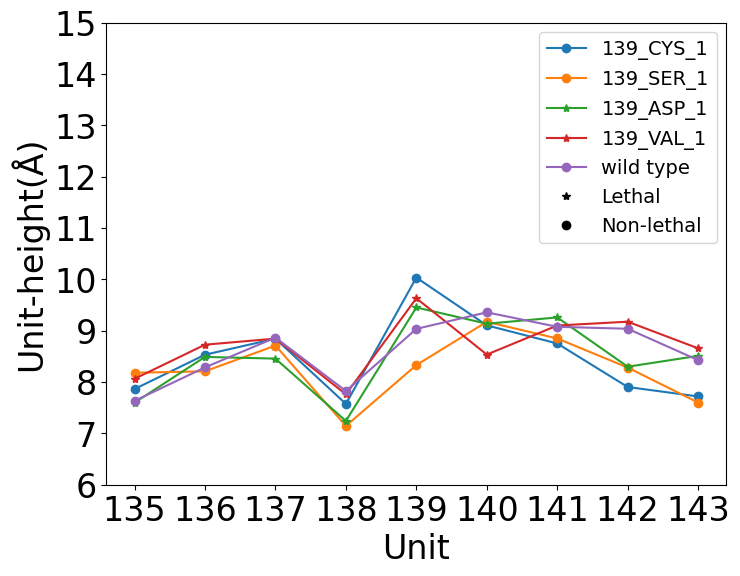

In [38]:
columns = list(zip(*unhei_71))
print(columns[2][4]-unhei_wt[4])
print(columns[3][5]-unhei_wt[5])
# xlabel=["u4","u3","u2","u1","m0","u1'","u2'","u3'","u4'"]
fontsize = 24
plt.figure(figsize=(8,6))
plt.ylim(6,15)
for i, (col,l) in enumerate(zip(columns,leth)):
    if l == 1:
        plt.plot(xlabel, col, marker='o', label=imform[i])
    if l == 0:
        plt.plot(xlabel, col, marker='*', label=imform[i])
plt.plot(xlabel, unhei_wt, marker='o', label="wild type")
plt.plot([], [], marker='*', color='k', linestyle='None', label='Lethal')
plt.plot([], [], marker='o', color='k', linestyle='None', label='Non-lethal')
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.xlabel("Unit",fontsize=fontsize)
plt.legend(fontsize=14)
plt.ylabel('Unit-height(Å)',fontsize=fontsize)

Text(0, 0.5, 'Radius(Å)')

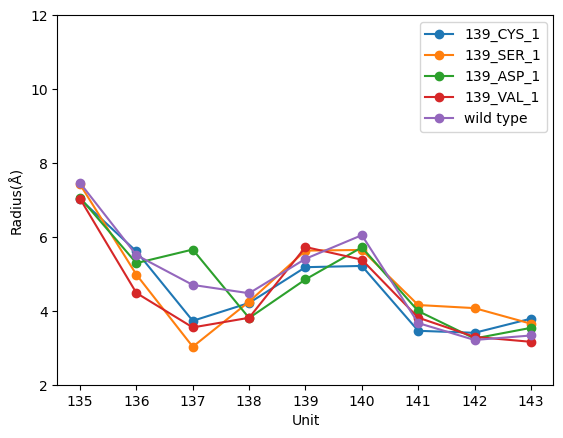

In [39]:
columns = list(zip(*rad_71))
plt.ylim(2,12)
xlabel = [135,136,137,138,139,140,141,142,143]
for i, col in enumerate(columns):
    plt.plot(xlabel, col, marker='o', label=imform[i])
plt.plot(xlabel, rad_wt, marker='o', label="wild type")
# plt.xticks(ticks=range(1, len(xlabel)+1 ), labels=xlabel, rotation=45, fontsize=10)
# plt.title("severe mutation dataset")
plt.xlabel("Unit")
plt.legend()
plt.ylabel('Radius(Å)', fontsize=10)

Text(0, 0.5, 'Unit-height(Å)')

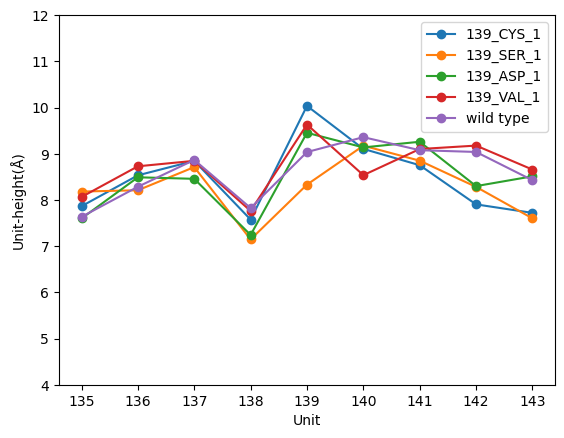

In [40]:
columns = list(zip(*unhei_71))
# xlabel=["u4","u3","u2","u1","m0","u1'","u2'","u3'","u4'"]
plt.ylim(4,12)
xlabel = [135,136,137,138,139,140,141,142,143]
# plt.title("lethal dataset")
for i, col in enumerate(columns):
    plt.plot(xlabel, col, marker='o', label=imform[i])
plt.plot(xlabel, unhei_wt, marker='o', label="wild type")
# plt.xticks(ticks=range(1, len(xlabel) + 1), labels=xlabel, rotation=45, fontsize=10)
plt.xlabel("Unit")
plt.legend()
plt.ylabel('Unit-height(Å)', fontsize=10)

In [41]:
rad = [[] for _ in range(9)]
rad_diff = [[] for _ in range(9)]
rad_diff_lethal = [[] for _ in range(9)]
rad_diff_nonlethal = [[] for _ in range(9)]
rad_lethal = [[] for _ in range(9)]
rad_nonlethal = [[] for _ in range(9)]
rad_severe = [[] for _ in range(9)]
rad_moderate = [[] for _ in range(9)]
rad_mild = [[] for _ in range(9)]
rad_diff_severe = [[] for _ in range(9)]
rad_diff_moderate = [[] for _ in range(9)]
rad_diff_mild = [[] for _ in range(9)]
rad_severe = [[] for _ in range(9)]
rad_moderate = [[] for _ in range(9)]
rad_mild = [[] for _ in range(9)]
rad_diff_severe = [[] for _ in range(9)]
rad_diff_moderate = [[] for _ in range(9)]
rad_diff_mild = [[] for _ in range(9)]
rad_severe_lethal = [[] for _ in range(9)]
rad_moderate_lethal = [[] for _ in range(9)]
rad_mild_lethal = [[] for _ in range(9)]
rad_diff_severe_lethal = [[] for _ in range(9)]
rad_diff_moderate_lethal = [[] for _ in range(9)]
rad_diff_mild_lethal = [[] for _ in range(9)]
rad_severe_nonlethal = [[] for _ in range(9)]
rad_moderate_nonlethal = [[] for _ in range(9)]
rad_mild_nonlethal = [[] for _ in range(9)]
rad_diff_severe_nonlethal = [[] for _ in range(9)]
rad_diff_moderate_nonlethal = [[] for _ in range(9)]
rad_diff_mild_nonlethal = [[] for _ in range(9)]
u_wt = mda.Universe("../../dataset/structure/collagen_wt.pdb")
u_wt.trajectory[0]
for tri_pos,type,a12,l in zip(triplet_number,mutation_name,alpha12,lethal):
    x1 = 3*(tri_pos-1)+17
    x1_values = [x1 + i for i in range(-12, 13, 3)]
    x2 = 3*(tri_pos-1)+1054+10
    x2_values = [x2 + i for i in range(-12, 13, 3)]
    x3 = 3*(tri_pos-1)+17+2080
    x3_values = [x3 + i for i in range(-12, 13, 3)]
    file_pdb = f"../../dataset/structure/alpha{a12}_structure/{tri_pos}_{type}_{a12}.pdb"
    u1 = mda.Universe(file_pdb)
    u1.trajectory[0]
    # atoms = u1.select_atoms("name CA")
    # mutation
    alpha1_1_mu = u1.select_atoms(f"segid 0A and resid {x1}")
    alpha2_mu = u1.select_atoms(f"segid 0B and resid {x2}")   
    alpha1_2_mu= u1.select_atoms(f"segid 0C and resid {x3}")
    if a12 == 1:
        if alpha1_1_mu.resnames[0]!=type or alpha1_2_mu.resnames[0]!=type:
            print(f"{tri_pos}_{type}_{a12}")
            # raise Exception(f"{tri_pos}_{type}_{a12}")
        if alpha2_mu.resnames[0]!="GLY" :
            print(f"{tri_pos}_{type}_{a12}")
            # raise Exception(f"{tri_pos}_{type}_{a12}")
    if a12 == 2:    
        if alpha2_mu.resnames[0]!=type :
            print(f"{tri_pos}_{type}_{a12}")
            # raise Exception(f"{tri_pos}_{type}_{a12}")
        if alpha1_1_mu.resnames[0]!="GLY" or alpha1_2_mu.resnames[0]!="GLY":
            print(f"{tri_pos}_{type}_{a12}")
    for i, (x1, x2, x3) in enumerate(zip(x1_values, x2_values, x3_values)):
        alpha1_1_mu = u1.select_atoms(f"segid 0A and resid {x1}")
        alpha2_mu = u1.select_atoms(f"segid 0B and resid {x2}")   
        alpha1_2_mu= u1.select_atoms(f"segid 0C and resid {x3}")
        alpha1_1_center_mu = alpha1_1_mu.center_of_geometry()
        alpha2_center_mu = alpha2_mu.center_of_geometry()
        alpha1_2_center_mu = alpha1_2_mu.center_of_geometry()
        combined_atoms_mu = AtomGroup(alpha1_1_mu + alpha2_mu + alpha1_2_mu)
        combined_center_mu = combined_atoms_mu.center_of_geometry()
        distances_mu = [
        np.linalg.norm(alpha1_1_center_mu - combined_center_mu),
        np.linalg.norm(alpha2_center_mu - combined_center_mu),
        np.linalg.norm(alpha1_2_center_mu - combined_center_mu)
        ]
        average_distance_mu = np.mean(distances_mu)
        rad[i].append(average_distance_mu)
        # wild type
        alpha1_1_wt = u_wt.select_atoms(f"segid 0A and resid {x1}")
        alpha2_wt = u_wt.select_atoms(f"segid 0B and resid {x2}")   
        alpha1_2_wt= u_wt.select_atoms(f"segid 0C and resid {x3}")
        alpha1_1_center_wt = alpha1_1_wt.center_of_geometry()
        alpha2_center_wt = alpha2_wt.center_of_geometry()
        alpha1_2_center_wt = alpha1_2_wt.center_of_geometry()
        combined_atoms_wt = AtomGroup(alpha1_1_wt + alpha2_wt + alpha1_2_wt)
        combined_center_wt = combined_atoms_wt.center_of_geometry()
        distances_wt = [
        np.linalg.norm(alpha1_1_center_wt - combined_center_wt),
        np.linalg.norm(alpha2_center_wt - combined_center_wt),
        np.linalg.norm(alpha1_2_center_wt - combined_center_wt)
        ]
        average_distance_wt = np.mean(distances_wt)

        rad_diff[i].append(average_distance_mu-average_distance_wt)
        if type in severe:
            rad_severe[i].append(average_distance_mu)
            rad_diff_severe[i].append(average_distance_mu-average_distance_wt)
        if type in moderate:
            rad_moderate[i].append(average_distance_mu)
            rad_diff_moderate[i].append(average_distance_mu-average_distance_wt)
        if type in mild:
            rad_mild[i].append(average_distance_mu)
            rad_diff_mild[i].append(average_distance_mu-average_distance_wt)

        if type in severe and l==0:
            rad_severe_lethal[i].append(average_distance_mu)
            rad_diff_severe_lethal[i].append(average_distance_mu-average_distance_wt)
        if type in moderate and l==0:
            rad_moderate_lethal[i].append(average_distance_mu)
            rad_diff_moderate_lethal[i].append(average_distance_mu-average_distance_wt)
        if type in mild and l==0:
            rad_mild_lethal[i].append(average_distance_mu)
            rad_diff_mild_lethal[i].append(average_distance_mu-average_distance_wt)
        if type in severe and l==1:
            rad_severe_nonlethal[i].append(average_distance_mu)
            rad_diff_severe_nonlethal[i].append(average_distance_mu-average_distance_wt)
        if type in moderate and l==1:
            rad_moderate_nonlethal[i].append(average_distance_mu)
            rad_diff_moderate_nonlethal[i].append(average_distance_mu-average_distance_wt)
        if type in mild and l==1:
            rad_mild_nonlethal[i].append(average_distance_mu)
            rad_diff_mild_nonlethal[i].append(average_distance_mu-average_distance_wt)

        if l == 0:
            rad_lethal[i].append(average_distance_mu)
            rad_diff_lethal[i].append(average_distance_mu-average_distance_wt)
        if l == 1:   
            rad_nonlethal[i].append(average_distance_mu) 
            rad_diff_nonlethal[i].append(average_distance_mu-average_distance_wt)

In [42]:
unhei = [[] for _ in range(9)]
unhei_diff = [[] for _ in range(9)]
unhei_diff_lethal = [[] for _ in range(9)]
unhei_diff_nonlethal = [[] for _ in range(9)]
unhei_lethal = [[] for _ in range(9)]
unhei_nonlethal = [[] for _ in range(9)]
unhei_diff_severe = [[] for _ in range(9)]
unhei_diff_moderate = [[] for _ in range(9)]
unhei_diff_mild = [[] for _ in range(9)]
unhei_severe = [[] for _ in range(9)]
unhei_moderate = [[] for _ in range(9)]
unhei_mild = [[] for _ in range(9)]

unhei_diff_severe_lethal = [[] for _ in range(9)]
unhei_diff_moderate_lethal = [[] for _ in range(9)]
unhei_diff_mild_lethal = [[] for _ in range(9)]
unhei_severe_lethal = [[] for _ in range(9)]
unhei_moderate_lethal = [[] for _ in range(9)]
unhei_mild_lethal = [[] for _ in range(9)]

unhei_diff_severe_nonlethal = [[] for _ in range(9)]
unhei_diff_moderate_nonlethal = [[] for _ in range(9)]
unhei_diff_mild_nonlethal = [[] for _ in range(9)]
unhei_severe_nonlethal = [[] for _ in range(9)]
unhei_moderate_nonlethal = [[] for _ in range(9)]
unhei_mild_nonlethal = [[] for _ in range(9)]
u_wt = mda.Universe("../../dataset/structure/collagen_wt.pdb")
u_wt.trajectory[0]
for tri_pos,type,a12,l in zip(triplet_number,mutation_name,alpha12,lethal):
    x1 = 3*(tri_pos-1)+17
    x1_values = [x1 + i for i in range(-12, 16, 3)]
    x2 = 3*(tri_pos-1)+1054+10
    x2_values = [x2 + i for i in range(-12, 16, 3)]
    x3 = 3*(tri_pos-1)+17+2080
    x3_values = [x3 + i for i in range(-12, 16, 3)]
    file_pdb = f"../../dataset/structure/alpha{a12}_structure/{tri_pos}_{type}_{a12}.pdb"
    u1 = mda.Universe(file_pdb)
    u1.trajectory[0]
    atoms = u1.select_atoms("name CA")
    alpha1_1_mu = u1.select_atoms(f"segid 0A and resid {x1}")
    alpha2_mu = u1.select_atoms(f"segid 0B and resid {x2}")   
    alpha1_2_mu= u1.select_atoms(f"segid 0C and resid {x3}")
    if a12 == 1:
        if alpha1_1_mu.resnames[0]!=type or alpha1_2_mu.resnames[0]!=type:
            print(f"{tri_pos}_{type}_{a12}")
            # raise Exception(f"{tri_pos}_{type}_{a12}")
        if alpha2_mu.resnames[0]!="GLY" :
            print(f"{tri_pos}_{type}_{a12}")
            # raise Exception(f"{tri_pos}_{type}_{a12}")
    if a12 == 2:    
        if alpha2_mu.resnames[0]!=type :
            print(f"{tri_pos}_{type}_{a12}")
            # raise Exception(f"{tri_pos}_{type}_{a12}")
        if alpha1_1_mu.resnames[0]!="GLY" or alpha1_2_mu.resnames[0]!="GLY":
            print(f"{tri_pos}_{type}_{a12}")
    unit_mass_center_mu = []
    unit_mass_center_wt = []
    for i, (x1, x2, x3) in enumerate(zip(x1_values, x2_values, x3_values)):
        alpha1_1_mu = u1.select_atoms(f"segid 0A and resid {x1}")
        alpha2_mu = u1.select_atoms(f"segid 0B and resid {x2}")   
        alpha1_2_mu= u1.select_atoms(f"segid 0C and resid {x3}")
        alpha1_1_center_mu = alpha1_1_mu.center_of_geometry()
        alpha2_center_mu = alpha2_mu.center_of_geometry()
        alpha1_2_center_mu = alpha1_2_mu.center_of_geometry()
        combined_atoms_mu = AtomGroup(alpha1_1_mu + alpha2_mu + alpha1_2_mu)
        combined_center_mu = combined_atoms_mu.center_of_geometry()
        unit_mass_center_mu.append(combined_center_mu)
        # wild type
        alpha1_1_wt = u_wt.select_atoms(f"segid 0A and resid {x1}")
        alpha2_wt = u_wt.select_atoms(f"segid 0B and resid {x2}")   
        alpha1_2_wt= u_wt.select_atoms(f"segid 0C and resid {x3}")
        alpha1_1_center_wt = alpha1_1_wt.center_of_geometry()
        alpha2_center_wt = alpha2_wt.center_of_geometry()
        alpha1_2_center_wt = alpha1_2_wt.center_of_geometry()
        combined_atoms_wt = AtomGroup(alpha1_1_wt + alpha2_wt + alpha1_2_wt)
        combined_center_wt = combined_atoms_wt.center_of_geometry()
        unit_mass_center_wt.append(combined_center_wt)
    for i in range(len(unit_mass_center_mu) - 1):
        distance_mu = np.linalg.norm(unit_mass_center_mu[i] - unit_mass_center_mu[i + 1])
        distance_wt = np.linalg.norm(unit_mass_center_wt[i] - unit_mass_center_wt[i + 1])
        unhei[i].append(distance_mu)
        unhei_diff[i].append(distance_mu-distance_wt)
        if l == 0:
            unhei_lethal[i].append(distance_mu)
            unhei_diff_lethal[i].append(distance_mu-distance_wt)
        if l == 1:
            unhei_nonlethal[i].append(distance_mu)
            unhei_diff_nonlethal[i].append(distance_mu-distance_wt)
        if type in severe:
            unhei_severe[i].append(distance_mu)
            unhei_diff_severe[i].append(distance_mu-distance_wt)
        if type in moderate:
            unhei_moderate[i].append(distance_mu)
            unhei_diff_moderate[i].append(distance_mu-distance_wt)
        if type in mild:
            unhei_mild[i].append(distance_mu)
            unhei_diff_mild[i].append(distance_mu-distance_wt)

        if type in severe and l==0:
            unhei_severe_lethal[i].append(distance_mu)
            unhei_diff_severe_lethal[i].append(distance_mu-distance_wt)
        if type in moderate and l==0:
            unhei_moderate_lethal[i].append(distance_mu)
            unhei_diff_moderate_lethal[i].append(distance_mu-distance_wt)
        if type in mild and l==0:
            unhei_mild_lethal[i].append(distance_mu)
            unhei_diff_mild_lethal[i].append(distance_mu-distance_wt)
        if type in severe and l==1:
            unhei_severe_nonlethal[i].append(distance_mu)
            unhei_diff_severe_nonlethal[i].append(distance_mu-distance_wt)
        if type in moderate and l==1:
            unhei_moderate_nonlethal[i].append(distance_mu)
            unhei_diff_moderate_nonlethal[i].append(distance_mu-distance_wt)
        if type in mild and l==1:
            unhei_mild_nonlethal[i].append(distance_mu)
            unhei_diff_mild_nonlethal[i].append(distance_mu-distance_wt)
# print(unhei)
        # rad[i].append(average_distance)

In [43]:

xlabel=["P4","P3","P2","P1","m0","P1'","P2'","P3'","P4'"]
boxplot_stats = []
rad_zip = zip(rad_diff_moderate,rad_diff_mild)
unhei_zip = zip(unhei_diff_moderate,unhei_diff_mild)
# rad_zip = zip(rad_diff_lethal,rad_diff_nonlethal)
# unhei_zip = zip(unhei_diff_lethal,unhei_diff_nonlethal)
print("unit height:")
for i,(rad_l,rad_nl) in enumerate(unhei_zip):
    # if i == 4:
    rad_l = np.sort(rad_l)
    Q1_l = np.percentile(rad_l, 25)
    Q2_l = np.percentile(rad_l, 50)
    Q3_l = np.percentile(rad_l, 75)
    IQR_l = Q3_l - Q1_l
    lower_whisker_l = np.min(rad_l[rad_l >= (Q1_l - 1.5 * IQR_l)])
    upper_whisker_l = np.max(rad_l[rad_l <= (Q3_l + 1.5 * IQR_l)]) 

    rad_nl = np.sort(rad_nl)
    Q1_nl = np.percentile(rad_nl, 25)
    Q2_nl = np.percentile(rad_nl, 50)
    Q3_nl = np.percentile(rad_nl, 75)
    IQR_nl = Q3_nl - Q1_nl
    lower_whisker_nl = np.min(rad_nl[rad_nl >= (Q1_nl - 1.5 * IQR_nl)])
    upper_whisker_nl = np.max(rad_nl[rad_nl <= (Q3_nl + 1.5 * IQR_nl)]) 
    diff =(upper_whisker_l - upper_whisker_nl) + (Q3_l - Q3_nl) + (Q2_l - Q2_nl)+(Q1_l - Q1_nl)+(lower_whisker_l - lower_whisker_nl)
    if diff <=0:
        Q3_com = False
    else :
        Q3_com = True
    # print((upper_whisker_l - upper_whisker_nl))
    # print((Q3_l - Q3_nl))
    # print((Q2_l - Q2_nl))
    # print((Q1_l - Q1_nl))
    # print((lower_whisker_l - lower_whisker_nl))
    # print((upper_whisker_l - upper_whisker_nl) + (Q3_l - Q3_nl) + (Q2_l - Q2_nl)+(Q1_l - Q1_nl)+(lower_whisker_l - lower_whisker_nl))
    print(f"{xlabel[i]} : {Q3_com}, {diff}")
print("radius:")
for i,(rad_l,rad_nl) in enumerate(rad_zip):
    # if i == 3:
    rad_l = np.sort(rad_l)
    Q1_l = np.percentile(rad_l, 25)
    Q2_l = np.percentile(rad_l, 50)
    Q3_l = np.percentile(rad_l, 75)
    IQR_l = Q3_l - Q1_l
    lower_whisker_l = np.min(rad_l[rad_l >= (Q1_l - 1.5 * IQR_l)])
    upper_whisker_l = np.max(rad_l[rad_l <= (Q3_l + 1.5 * IQR_l)]) 

    rad_nl = np.sort(rad_nl)
    Q1_nl = np.percentile(rad_nl, 25)
    Q2_nl = np.percentile(rad_nl, 50)
    Q3_nl = np.percentile(rad_nl, 75)
    IQR_nl = Q3_nl - Q1_nl
    lower_whisker_nl = np.min(rad_nl[rad_nl >= (Q1_nl - 1.5 * IQR_nl)])
    upper_whisker_nl = np.max(rad_nl[rad_nl <= (Q3_nl + 1.5 * IQR_nl)]) 
    diff =(upper_whisker_l - upper_whisker_nl) + (Q3_l - Q3_nl) + (Q2_l - Q2_nl)+(Q1_l - Q1_nl)+(lower_whisker_l - lower_whisker_nl)
    if diff <=0:
        Q3_com = False
    else :
        Q3_com = True
    # print((upper_whisker_l - upper_whisker_nl))
    # print((Q3_l - Q3_nl))
    # print((Q2_l - Q2_nl))
    # print((Q1_l - Q1_nl))
    # print((lower_whisker_l - lower_whisker_nl))
    # print((upper_whisker_l - upper_whisker_nl) + (Q3_l - Q3_nl) + (Q2_l - Q2_nl)+(Q1_l - Q1_nl)+(lower_whisker_l - lower_whisker_nl))
    print(f"{xlabel[i]} : {Q3_com}, {diff}")
    # print(f"{xlabel[i]} (lethal vs. nonlethal) upper : {upper_whisker_com}")



unit height:
P4 : False, -0.23180821208815727
P3 : False, -0.27667314755169015
P2 : False, -0.5435484076088579
P1 : True, 1.0277958608489048
m0 : True, 1.0550683579317064
P1' : False, -0.17761239960901776
P2' : True, 0.2915330549918269
P3' : True, 0.05650367710755244
P4' : False, -0.08306007253349401
radius:
P4 : False, -0.21176229369762778
P3 : True, 0.8207670095342137
P2 : True, 0.4042232490161891
P1 : True, 0.10306247810551006
m0 : True, 2.626553144843851
P1' : False, -0.213220420307776
P2' : False, -0.5133696625761299
P3' : True, 0.8661030569364812
P4' : False, -0.17121131686170876


(array([ 2.,  4.,  6.,  8., 10., 12.]),
 [Text(0, 2.0, '2'),
  Text(0, 4.0, '4'),
  Text(0, 6.0, '6'),
  Text(0, 8.0, '8'),
  Text(0, 10.0, '10'),
  Text(0, 12.0, '12')])

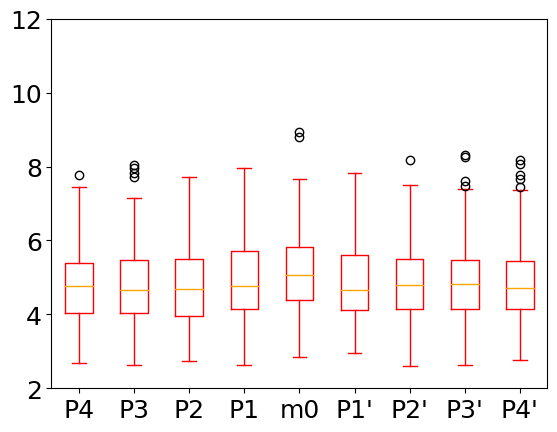

In [112]:
plt.ylim(2,12)
# xlabel=["u4","u3","u2","u1","m0","u1'","u2'","u3'","u4'"]
plt.boxplot(rad_severe, boxprops=dict(color="red"),medianprops=dict(color="orange"),  
                   whiskerprops=dict(color="red"),  
                   capprops=dict(color="red"))
plt.xticks(ticks=range(1, len(xlabel) + 1), labels=xlabel, fontsize=18)
plt.yticks(fontsize=18)
# plt.title("severe mutation dataset")
# plt.ylabel('Radius(Å)', fontsize=16)


Text(0, 0.5, 'Radius(Å)')

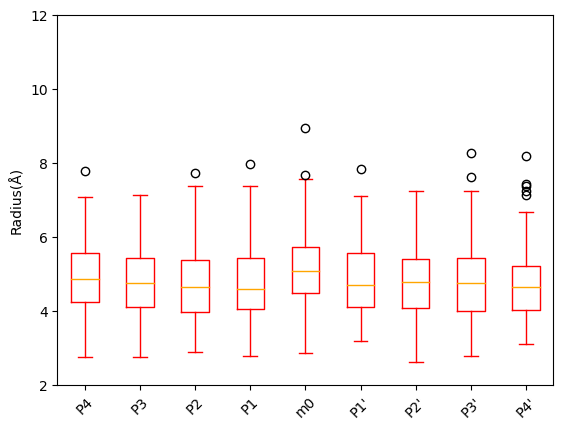

In [45]:
plt.ylim(2,12)
# xlabel=["u4","u3","u2","u1","m0","u1'","u2'","u3'","u4'"]
plt.boxplot(rad_severe_lethal, boxprops=dict(color="red"),medianprops=dict(color="orange"),  
                   whiskerprops=dict(color="red"),  
                   capprops=dict(color="red"))
plt.xticks(ticks=range(1, len(xlabel) + 1), labels=xlabel, rotation=45, fontsize=10)
# plt.title("severe mutation lethal dataset")
plt.ylabel('Radius(Å)', fontsize=10)

Text(0, 0.5, 'Radius(Å)')

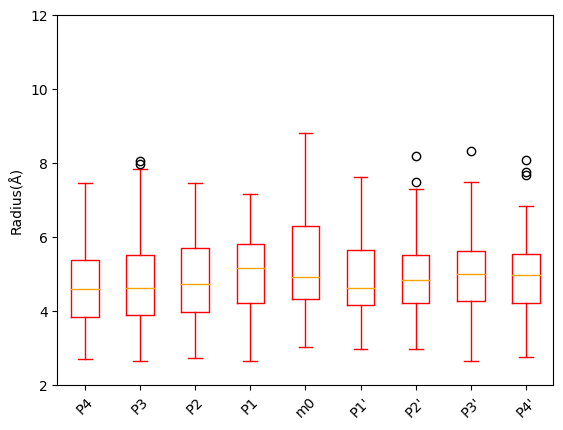

In [46]:
plt.ylim(2,12)
# xlabel=["u4","u3","u2","u1","m0","u1'","u2'","u3'","u4'"]
plt.boxplot(rad_severe_nonlethal, boxprops=dict(color="red"),medianprops=dict(color="orange"),  
                   whiskerprops=dict(color="red"),  
                   capprops=dict(color="red"))
plt.xticks(ticks=range(1, len(xlabel) + 1), labels=xlabel, rotation=45, fontsize=10)
# plt.title("severe mutation nonlethal dataset")
plt.ylabel('Radius(Å)', fontsize=10)

(array([ 2.,  4.,  6.,  8., 10., 12.]),
 [Text(0, 2.0, '2'),
  Text(0, 4.0, '4'),
  Text(0, 6.0, '6'),
  Text(0, 8.0, '8'),
  Text(0, 10.0, '10'),
  Text(0, 12.0, '12')])

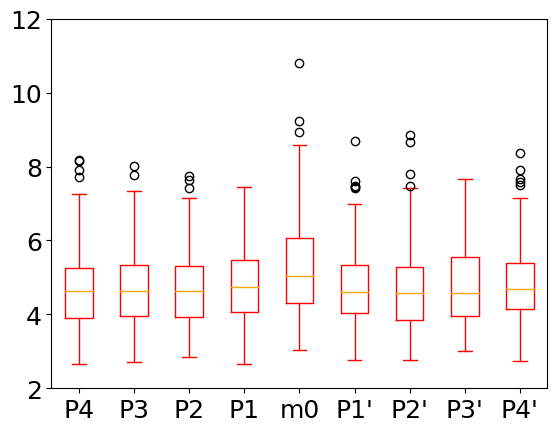

In [116]:
plt.ylim(2,12)
# xlabel=["u4","u3","u2","u1","m0","u1'","u2'","u3'","u4'"]
# plt.title("moderate mutation dataset")
plt.boxplot(rad_moderate, boxprops=dict(color="red"),medianprops=dict(color="orange"),  
                   whiskerprops=dict(color="red"),  
                   capprops=dict(color="red"))
plt.xticks(ticks=range(1, len(xlabel) + 1), labels=xlabel, fontsize=18)
plt.yticks(fontsize=18)

Text(0, 0.5, 'Radius(Å)')

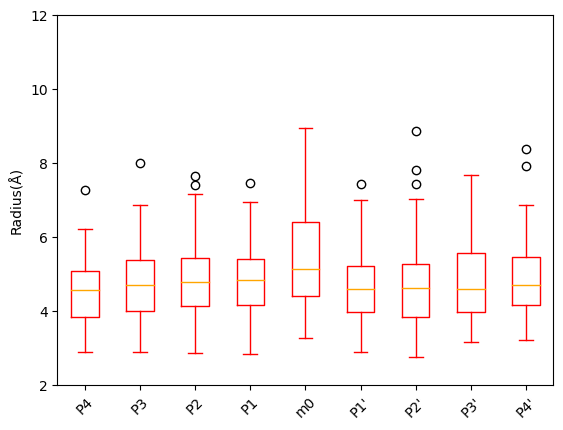

In [48]:
plt.ylim(2,12)
# xlabel=["u4","u3","u2","u1","m0","u1'","u2'","u3'","u4'"]
# plt.title("moderate mutation lethal dataset")
plt.boxplot(rad_moderate_lethal, boxprops=dict(color="red"),medianprops=dict(color="orange"),  
                   whiskerprops=dict(color="red"),  
                   capprops=dict(color="red"))
plt.xticks(ticks=range(1, len(xlabel) + 1), labels=xlabel, rotation=45, fontsize=10)
plt.ylabel('Radius(Å)', fontsize=10)

Text(0, 0.5, 'Radius(Å)')

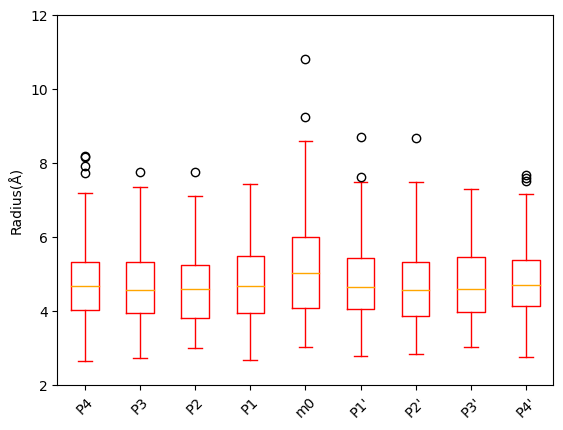

In [49]:
plt.ylim(2,12)
# xlabel=["u4","u3","u2","u1","m0","u1'","u2'","u3'","u4'"]
# plt.title("moderate mutation nonlethal dataset")
plt.boxplot(rad_moderate_nonlethal, boxprops=dict(color="red"),medianprops=dict(color="orange"),  
                   whiskerprops=dict(color="red"),  
                   capprops=dict(color="red"))
plt.xticks(ticks=range(1, len(xlabel) + 1), labels=xlabel, rotation=45, fontsize=10)
plt.ylabel('Radius(Å)', fontsize=10)

(array([ 2.,  4.,  6.,  8., 10., 12.]),
 [Text(0, 2.0, '2'),
  Text(0, 4.0, '4'),
  Text(0, 6.0, '6'),
  Text(0, 8.0, '8'),
  Text(0, 10.0, '10'),
  Text(0, 12.0, '12')])

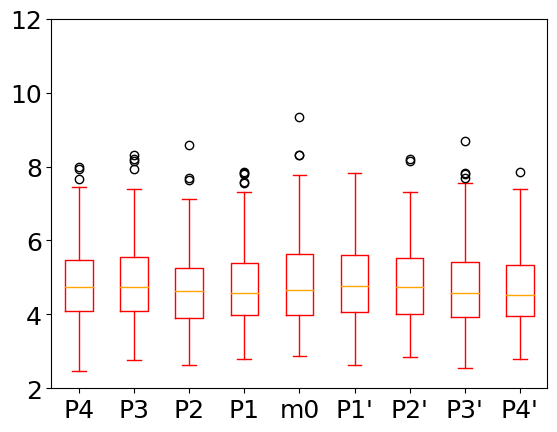

In [118]:
# xlabel=["u4","u3","u2","u1","m0","u1'","u2'","u3'","u4'"]
# plt.title("mild mutation dataset")
plt.ylim(2,12)
plt.boxplot(rad_mild, boxprops=dict(color="red"),medianprops=dict(color="orange"),  
                   whiskerprops=dict(color="red"),  
                   capprops=dict(color="red"))
plt.xticks(ticks=range(1, len(xlabel) + 1), labels=xlabel, fontsize=18)
plt.yticks(fontsize=18)

Text(0, 0.5, 'Radius(Å)')

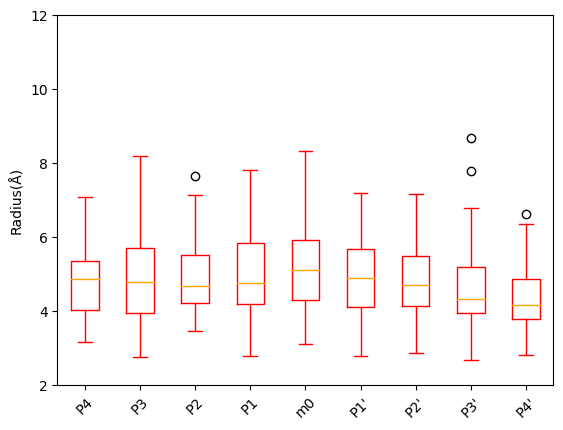

In [51]:
# xlabel=["u4","u3","u2","u1","m0","u1'","u2'","u3'","u4'"]
# plt.title("mild mutation lethal dataset")
plt.ylim(2,12)
plt.boxplot(rad_mild_lethal, boxprops=dict(color="red"),medianprops=dict(color="orange"),  
                   whiskerprops=dict(color="red"),  
                   capprops=dict(color="red"))
plt.xticks(ticks=range(1, len(xlabel) + 1), labels=xlabel, rotation=45, fontsize=10)
plt.ylabel('Radius(Å)', fontsize=10)

Text(0, 0.5, 'Radius(Å)')

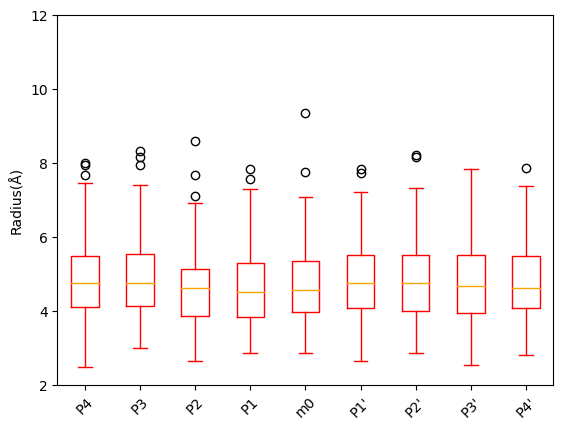

In [52]:
# xlabel=["u4","u3","u2","u1","m0","u1'","u2'","u3'","u4'"]
# plt.title("mild mutation nonlethal dataset")
plt.ylim(2,12)
plt.boxplot(rad_mild_nonlethal, boxprops=dict(color="red"),medianprops=dict(color="orange"),  
                   whiskerprops=dict(color="red"),  
                   capprops=dict(color="red"))
plt.xticks(ticks=range(1, len(xlabel) + 1), labels=xlabel, rotation=45, fontsize=10)
plt.ylabel('Radius(Å)', fontsize=10)

(array([-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.]),
 [Text(0, -4.0, '−4'),
  Text(0, -3.0, '−3'),
  Text(0, -2.0, '−2'),
  Text(0, -1.0, '−1'),
  Text(0, 0.0, '0'),
  Text(0, 1.0, '1'),
  Text(0, 2.0, '2'),
  Text(0, 3.0, '3'),
  Text(0, 4.0, '4')])

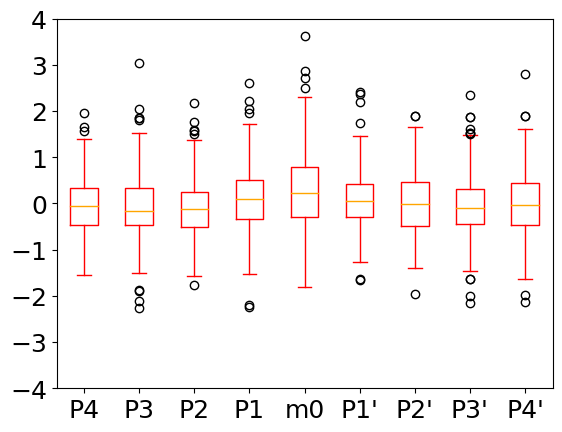

In [120]:
plt.ylim(-4,4)
# xlabel=["u4","u3","u2","u1","m0","u1'","u2'","u3'","u4'"]
plt.boxplot(rad_diff_severe, boxprops=dict(color="red"),medianprops=dict(color="orange"),  
                   whiskerprops=dict(color="red"),  
                   capprops=dict(color="red"))
plt.xticks(ticks=range(1, len(xlabel) + 1), labels=xlabel, fontsize=18)
plt.yticks(fontsize=18)

Text(0, 0.5, 'Radius difference(Å)')

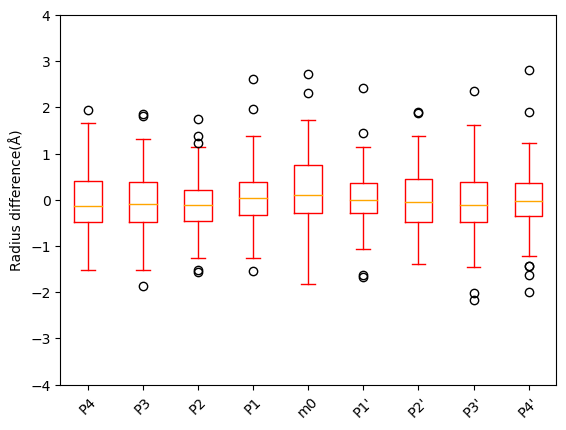

In [54]:
plt.ylim(-4,4)
# xlabel=["u4","u3","u2","u1","m0","u1'","u2'","u3'","u4'"]
plt.boxplot(rad_diff_severe_lethal, boxprops=dict(color="red"),medianprops=dict(color="orange"),  
                   whiskerprops=dict(color="red"),  
                   capprops=dict(color="red"))
plt.xticks(ticks=range(1, len(xlabel) + 1), labels=xlabel, rotation=45, fontsize=10)
# plt.title("severe lethal mutation dataset")
plt.ylabel('Radius difference(Å)', fontsize=10)

Text(0, 0.5, 'Radius difference(Å)')

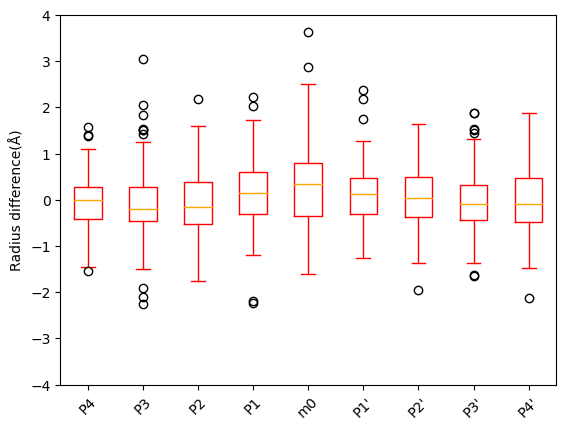

In [55]:
plt.ylim(-4,4)
# xlabel=["u4","u3","u2","u1","m0","u1'","u2'","u3'","u4'"]
plt.boxplot(rad_diff_severe_nonlethal, boxprops=dict(color="red"),medianprops=dict(color="orange"),  
                   whiskerprops=dict(color="red"),  
                   capprops=dict(color="red"))
plt.xticks(ticks=range(1, len(xlabel) + 1), labels=xlabel, rotation=45, fontsize=10)
# plt.title("severe nonlethal mutation dataset")
plt.ylabel('Radius difference(Å)', fontsize=10)

(array([-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.]),
 [Text(0, -4.0, '−4'),
  Text(0, -3.0, '−3'),
  Text(0, -2.0, '−2'),
  Text(0, -1.0, '−1'),
  Text(0, 0.0, '0'),
  Text(0, 1.0, '1'),
  Text(0, 2.0, '2'),
  Text(0, 3.0, '3'),
  Text(0, 4.0, '4')])

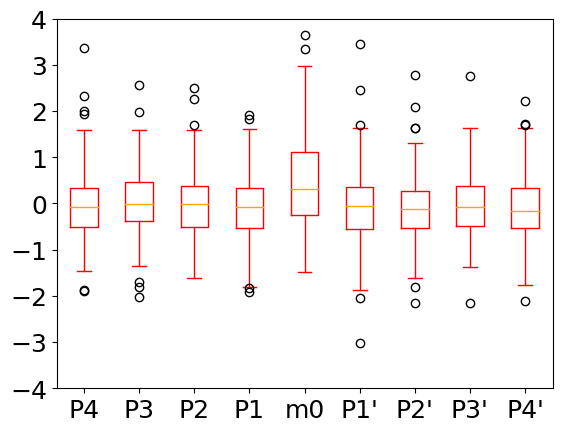

In [122]:
plt.ylim(-4,4)
# plt.title("moderate mutation dataset")
# xlabel=["u4","u3","u2","u1","m0","u1'","u2'","u3'","u4'"]
plt.boxplot(rad_diff_moderate, boxprops=dict(color="red"),medianprops=dict(color="orange"),  
                   whiskerprops=dict(color="red"),  
                   capprops=dict(color="red"))
plt.xticks(ticks=range(1, len(xlabel) + 1), labels=xlabel, fontsize=18)
plt.yticks(fontsize=18)

In [133]:
lethal_rad_posi_num = [sum(1 for value in sublist if value > 0) / (sum(1 for value in sublist if value != 0) or 1) for sublist in rad_diff_lethal]
nonlethal_rad_posi_num = [sum(1 for value in sublist if value > 0) / (sum(1 for value in sublist if value != 0) or 1) for sublist in rad_diff_nonlethal]
lethal_unhei_nega_num = [sum(1 for value in sublist if value < 0) / (sum(1 for value in sublist if value != 0) or 1) for sublist in unhei_diff_lethal]
nonlethal_unhei_nega_num = [sum(1 for value in sublist if value < 0) / (sum(1 for value in sublist if value != 0) or 1) for sublist in unhei_diff_nonlethal]

print(lethal_rad_posi_num)
print(nonlethal_rad_posi_num)
print(lethal_unhei_nega_num)
print(nonlethal_unhei_nega_num)

diff1 = [a - b for a, b in zip(lethal_rad_posi_num, nonlethal_rad_posi_num)]
diff2 = [a - b for a, b in zip(lethal_unhei_nega_num, nonlethal_unhei_nega_num)]
print(diff1)
print(diff2)

[0.4258373205741627, 0.4449760765550239, 0.4449760765550239, 0.507177033492823, 0.5885167464114832, 0.46411483253588515, 0.45454545454545453, 0.4449760765550239, 0.44976076555023925]
[0.47619047619047616, 0.4470899470899471, 0.42857142857142855, 0.46825396825396826, 0.5476190476190477, 0.5132275132275133, 0.455026455026455, 0.4312169312169312, 0.4576719576719577]
[0.5406698564593302, 0.49282296650717705, 0.49282296650717705, 0.4354066985645933, 0.4880382775119617, 0.5215311004784688, 0.5263157894736842, 0.5023923444976076, 0.5215311004784688]
[0.5238095238095238, 0.5079365079365079, 0.5105820105820106, 0.49206349206349204, 0.4126984126984127, 0.5185185185185185, 0.5185185185185185, 0.5185185185185185, 0.5105820105820106]
[-0.05035315561631348, -0.002113870534923179, 0.016404647983595366, 0.03892306523885469, 0.040897698792435544, -0.04911268069162811, -0.0004810004810004709, 0.013759145338092693, -0.007911192121718424]
[0.016860332649806353, -0.015113541429330857, -0.01775904407483353,

In [134]:
severe_rad_posi_num = [sum(1 for value in sublist if value > 0) / (sum(1 for value in sublist if value != 0) or 1) for sublist in rad_diff_severe]
moderate_rad_posi_num = [sum(1 for value in sublist if value > 0) / (sum(1 for value in sublist if value != 0) or 1) for sublist in rad_diff_moderate]
mild_rad_posi_num = [sum(1 for value in sublist if value > 0) / (sum(1 for value in sublist if value != 0) or 1) for sublist in rad_diff_mild]

severe_unhei_nega_num = [sum(1 for value in sublist if value < 0) / (sum(1 for value in sublist if value != 0) or 1) for sublist in unhei_diff_severe]
moderate_unhei_nega_num = [sum(1 for value in sublist if value < 0) / (sum(1 for value in sublist if value != 0) or 1) for sublist in unhei_diff_moderate]
mild_unhei_nega_num = [sum(1 for value in sublist if value < 0) / (sum(1 for value in sublist if value != 0) or 1) for sublist in unhei_diff_mild]

print(severe_rad_posi_num)
print(moderate_rad_posi_num)
print(mild_rad_posi_num)
print(severe_unhei_nega_num)
print(moderate_unhei_nega_num)
print(mild_unhei_nega_num)

diff1 = [a - b for a, b in zip(severe_rad_posi_num, moderate_rad_posi_num)]
diff2 = [a - b for a, b in zip(severe_rad_posi_num, mild_rad_posi_num)]
diff3 = [a - b for a, b in zip(moderate_rad_posi_num, mild_rad_posi_num)]
diff4 = [a - b for a, b in zip(severe_unhei_nega_num, moderate_unhei_nega_num)]
diff5 = [a - b for a, b in zip(severe_unhei_nega_num, mild_unhei_nega_num)]
diff6 = [a - b for a, b in zip(moderate_unhei_nega_num, mild_unhei_nega_num)]

print(diff1)
print(diff2)
print(diff3)
print(diff4)
print(diff5)
print(diff6)

[0.4368421052631579, 0.39473684210526316, 0.4, 0.5789473684210527, 0.5947368421052631, 0.5368421052631579, 0.49473684210526314, 0.43157894736842106, 0.4631578947368421]
[0.4320388349514563, 0.49029126213592233, 0.49029126213592233, 0.4563106796116505, 0.6310679611650486, 0.470873786407767, 0.4223300970873786, 0.45145631067961167, 0.4320388349514563]
[0.5078534031413613, 0.450261780104712, 0.4083769633507853, 0.41361256544502617, 0.45549738219895286, 0.4816753926701571, 0.450261780104712, 0.42408376963350786, 0.4712041884816754]
[0.531578947368421, 0.48947368421052634, 0.531578947368421, 0.4789473684210526, 0.43157894736842106, 0.49473684210526314, 0.5263157894736842, 0.46842105263157896, 0.5052631578947369]
[0.5339805825242718, 0.5048543689320388, 0.529126213592233, 0.4174757281553398, 0.3640776699029126, 0.529126213592233, 0.5048543689320388, 0.5242718446601942, 0.5097087378640777]
[0.5235602094240838, 0.5130890052356021, 0.450261780104712, 0.5235602094240838, 0.5287958115183246, 0.53

(array([-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.]),
 [Text(0, -4.0, '−4'),
  Text(0, -3.0, '−3'),
  Text(0, -2.0, '−2'),
  Text(0, -1.0, '−1'),
  Text(0, 0.0, '0'),
  Text(0, 1.0, '1'),
  Text(0, 2.0, '2'),
  Text(0, 3.0, '3'),
  Text(0, 4.0, '4')])

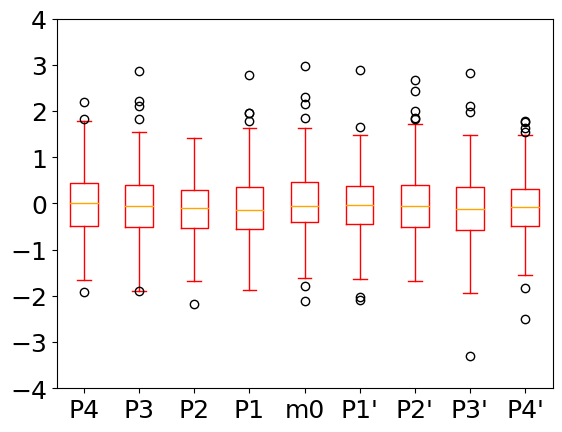

In [124]:
# xlabel=["u4","u3","u2","u1","m0","u1'","u2'","u3'","u4'"]
# plt.title("mild mutation dataset")
# plt.figure(figsize=(5,4))
plt.ylim(-4,4)
plt.boxplot(rad_diff_mild, boxprops=dict(color="red"),medianprops=dict(color="orange"),  
                   whiskerprops=dict(color="red"),  
                   capprops=dict(color="red"))
plt.xticks(ticks=range(1, len(xlabel) + 1), labels=xlabel, fontsize=18)
plt.yticks(fontsize=18)

Text(0, 0.5, 'Radius difference(Å)')

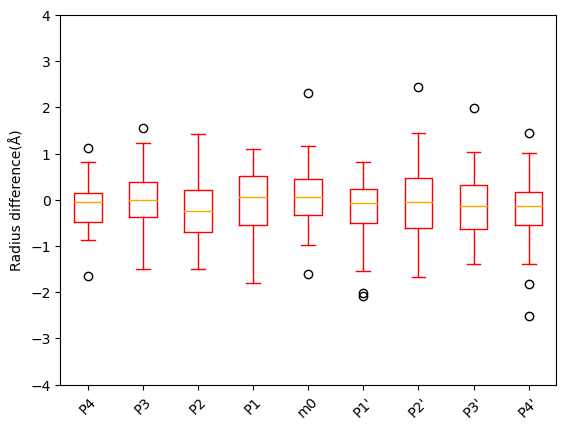

In [60]:
# xlabel=["u4","u3","u2","u1","m0","u1'","u2'","u3'","u4'"]
# plt.title("mild lethal mutation dataset")
plt.ylim(-4,4)
plt.boxplot(rad_diff_mild_lethal, boxprops=dict(color="red"),medianprops=dict(color="orange"),  
                   whiskerprops=dict(color="red"),  
                   capprops=dict(color="red"))
plt.xticks(ticks=range(1, len(xlabel) + 1), labels=xlabel, rotation=45, fontsize=10)
plt.ylabel('Radius difference(Å)', fontsize=10)

Text(0, 0.5, 'Radius difference(Å)')

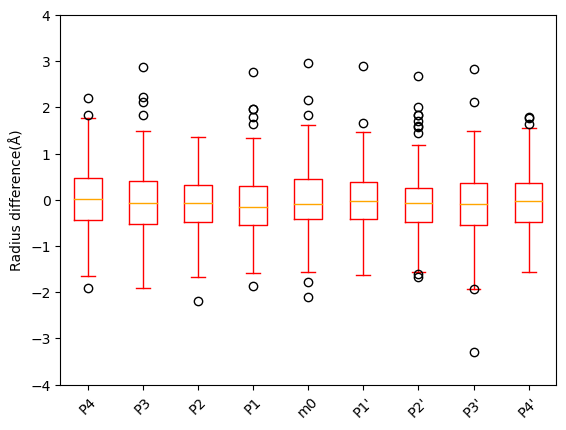

In [61]:
# xlabel=["u4","u3","u2","u1","m0","u1'","u2'","u3'","u4'"]
# plt.title("mild mutation nonlethal dataset")
plt.ylim(-4,4)
plt.boxplot(rad_diff_mild_nonlethal, boxprops=dict(color="red"),medianprops=dict(color="orange"),  
                   whiskerprops=dict(color="red"),  
                   capprops=dict(color="red"))
plt.xticks(ticks=range(1, len(xlabel) + 1), labels=xlabel, rotation=45, fontsize=10)
plt.ylabel('Radius difference(Å)', fontsize=10)

Text(0, 0.5, 'Radius(Å)')

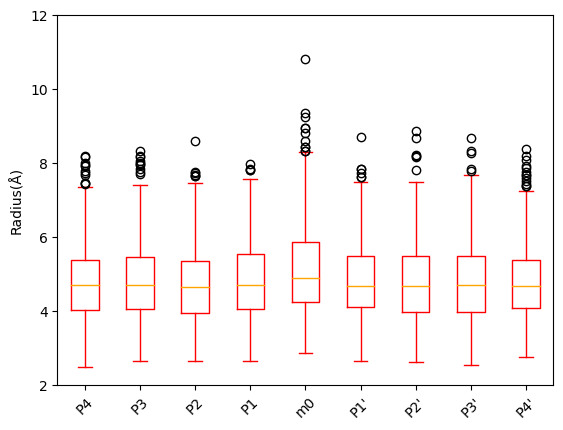

In [62]:
# xlabel=["u4","u3","u2","u1","m0","u1'","u2'","u3'","u4'"]
plt.ylim(2,12)
# plt.title('full dataset')
plt.boxplot(rad, boxprops=dict(color="red"),medianprops=dict(color="orange"),  
                   whiskerprops=dict(color="red"),  
                   capprops=dict(color="red"))
plt.xticks(ticks=range(1, len(xlabel) + 1), labels=xlabel, rotation=45, fontsize=10)
plt.ylabel('Radius(Å)', fontsize=10)

(array([ 2.,  4.,  6.,  8., 10., 12.]),
 [Text(0, 2.0, '2'),
  Text(0, 4.0, '4'),
  Text(0, 6.0, '6'),
  Text(0, 8.0, '8'),
  Text(0, 10.0, '10'),
  Text(0, 12.0, '12')])

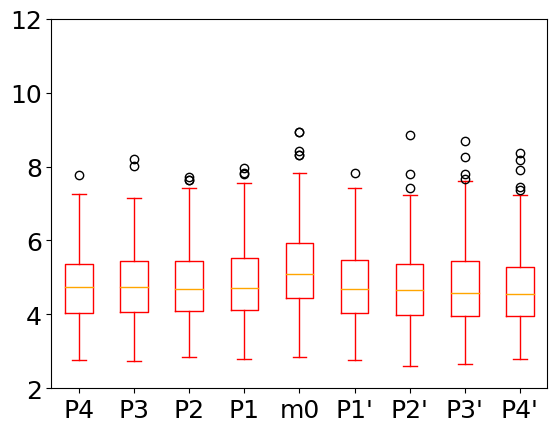

In [103]:
# xlabel=["u4","u3","u2","u1","m0","u1'","u2'","u3'","u4'"]
plt.ylim(2,12)
# plt.title("lethal dataset")
plt.boxplot(rad_lethal, boxprops=dict(color="red"),medianprops=dict(color="orange"),  
                   whiskerprops=dict(color="red"),  
                   capprops=dict(color="red"))
plt.xticks(ticks=range(1, len(xlabel) + 1), labels=xlabel, fontsize=18)
plt.yticks(fontsize=18)
# plt.ylabel('Radius(Å)', fontsize=10)
# plt.xlabel('Unit', fontsize=10)


(array([ 2.,  4.,  6.,  8., 10., 12.]),
 [Text(0, 2.0, '2'),
  Text(0, 4.0, '4'),
  Text(0, 6.0, '6'),
  Text(0, 8.0, '8'),
  Text(0, 10.0, '10'),
  Text(0, 12.0, '12')])

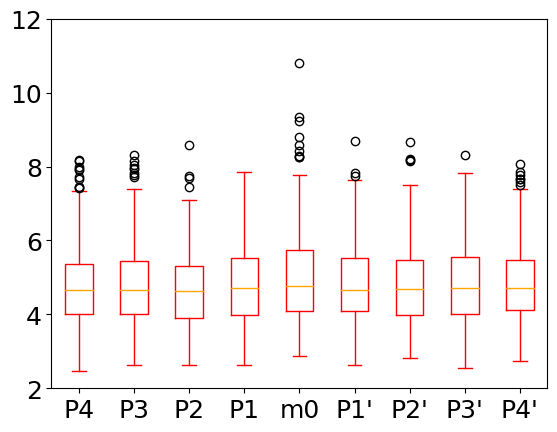

In [106]:
# xlabel=["u4","u3","u2","u1","m0","u1'","u2'","u3'","u4'"]
plt.ylim(2,12)
# plt.title("nonlethal")
plt.boxplot(rad_nonlethal, boxprops=dict(color="red"),medianprops=dict(color="orange"),  
                   whiskerprops=dict(color="red"),  
                   capprops=dict(color="red"))
# plt.xticks(ticks=range(1, len(xlabel) + 1), labels=xlabel, rotation=45, fontsize=10)
plt.xticks(ticks=range(1, len(xlabel) + 1), labels=xlabel, fontsize=18)
plt.yticks(fontsize=18)

Text(0, 0.5, 'Radius difference(Å)')

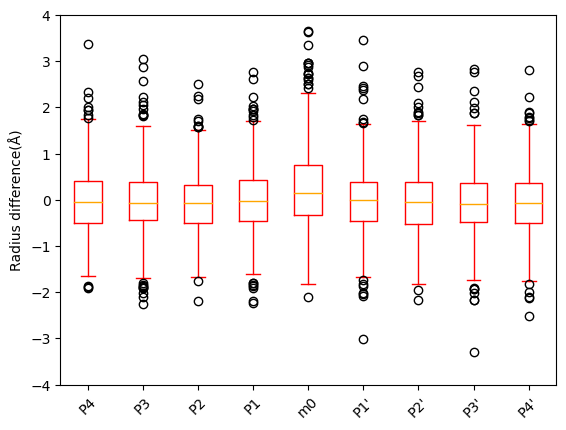

In [65]:
# print([x for x,value in enumerate(rad[5]) if value > 10])
# print(mutation_name[217])
# print(triplet_number[217])
# print(alpha12[217])
# print(rad_diff)
# xlabel=["u4","u3","u2","u1","m0","u1'","u2'","u3'","u4'"]
# plt.title("full dataset")
plt.ylim(-4,4)
plt.boxplot(rad_diff, boxprops=dict(color="red"),medianprops=dict(color="orange"),  
                   whiskerprops=dict(color="red"),  
                   capprops=dict(color="red"))
plt.xticks(ticks=range(1, len(xlabel) + 1), labels=xlabel, rotation=45, fontsize=10)
plt.ylabel('Radius difference(Å)', fontsize=10)

(array([-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.]),
 [Text(0, -4.0, '−4'),
  Text(0, -3.0, '−3'),
  Text(0, -2.0, '−2'),
  Text(0, -1.0, '−1'),
  Text(0, 0.0, '0'),
  Text(0, 1.0, '1'),
  Text(0, 2.0, '2'),
  Text(0, 3.0, '3'),
  Text(0, 4.0, '4')])

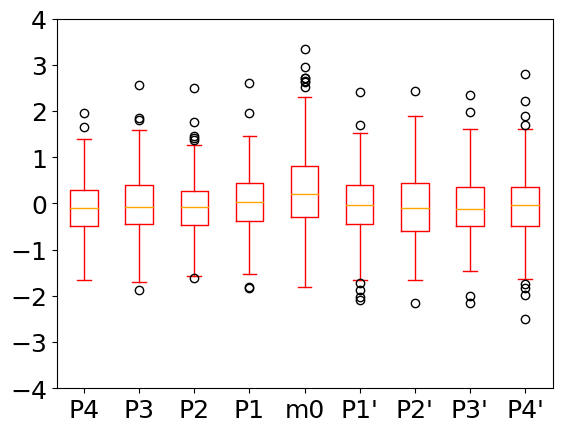

In [107]:
# print([x for x,value in enumerate(rad[5]) if value > 10])
# print(mutation_name[217])
# print(triplet_number[217])
# print(alpha12[217])
# plt.title("lethal dataset")
# xlabel=["u4","u3","u2","u1","m0","u1'","u2'","u3'","u4'"]
plt.ylim(-4,4)
plt.boxplot(rad_diff_lethal, boxprops=dict(color="red"),medianprops=dict(color="orange"),  
                   whiskerprops=dict(color="red"),  
                   capprops=dict(color="red"))
plt.xticks(ticks=range(1, len(xlabel) + 1), labels=xlabel, fontsize=18)
plt.yticks(fontsize=18)

(array([-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.]),
 [Text(0, -4.0, '−4'),
  Text(0, -3.0, '−3'),
  Text(0, -2.0, '−2'),
  Text(0, -1.0, '−1'),
  Text(0, 0.0, '0'),
  Text(0, 1.0, '1'),
  Text(0, 2.0, '2'),
  Text(0, 3.0, '3'),
  Text(0, 4.0, '4')])

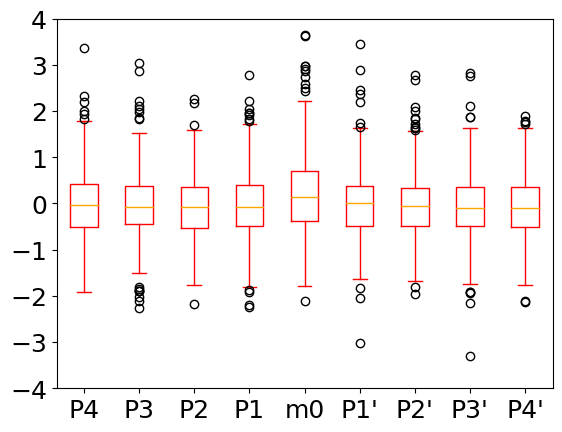

In [108]:
# xlabel=["u4","u3","u2","u1","m0","u1'","u2'","u3'","u4'"]
plt.ylim(-4,4)
# plt.title("nonlethal dataset")
plt.boxplot(rad_diff_nonlethal, boxprops=dict(color="red"),medianprops=dict(color="orange"),  
                   whiskerprops=dict(color="red"),  
                   capprops=dict(color="red"))
plt.xticks(ticks=range(1, len(xlabel) + 1), labels=xlabel, fontsize=18)
plt.yticks(fontsize=18)

(array([ 4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.]),
 [Text(0, 4.0, '4'),
  Text(0, 5.0, '5'),
  Text(0, 6.0, '6'),
  Text(0, 7.0, '7'),
  Text(0, 8.0, '8'),
  Text(0, 9.0, '9'),
  Text(0, 10.0, '10'),
  Text(0, 11.0, '11'),
  Text(0, 12.0, '12')])

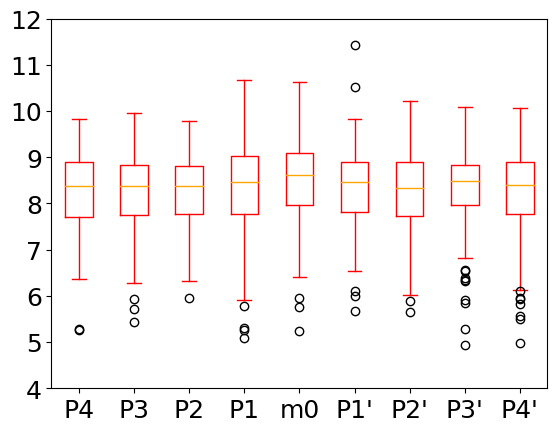

In [111]:
# xlabel=["u4","u3","u2","u1","m0","u1'","u2'","u3'","u4'"]
# plt.title("severe mutation dataset")
plt.ylim(4,12)
plt.boxplot(unhei_severe, boxprops=dict(color="red"),medianprops=dict(color="orange"),  
                   whiskerprops=dict(color="red"),  
                   capprops=dict(color="red"))
plt.xticks(ticks=range(1, len(xlabel) + 1), labels=xlabel, fontsize=18)
plt.yticks(fontsize=18)

(array([ 4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.]),
 [Text(0, 4.0, '4'),
  Text(0, 5.0, '5'),
  Text(0, 6.0, '6'),
  Text(0, 7.0, '7'),
  Text(0, 8.0, '8'),
  Text(0, 9.0, '9'),
  Text(0, 10.0, '10'),
  Text(0, 11.0, '11'),
  Text(0, 12.0, '12')])

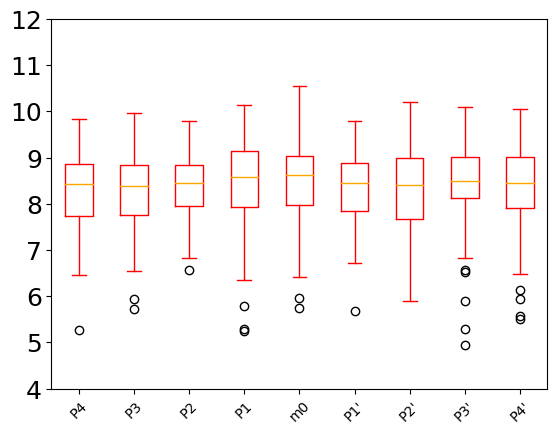

In [114]:
# xlabel=["u4","u3","u2","u1","m0","u1'","u2'","u3'","u4'"]
# plt.title("severe lethal mutation dataset")
plt.ylim(4,12)
plt.boxplot(unhei_severe_lethal, boxprops=dict(color="red"),medianprops=dict(color="orange"),  
                   whiskerprops=dict(color="red"),  
                   capprops=dict(color="red"))
plt.xticks(ticks=range(1, len(xlabel) + 1), labels=xlabel, rotation=45, fontsize=10)
plt.yticks(fontsize=18)

Text(0, 0.5, 'Unit-height(Å)')

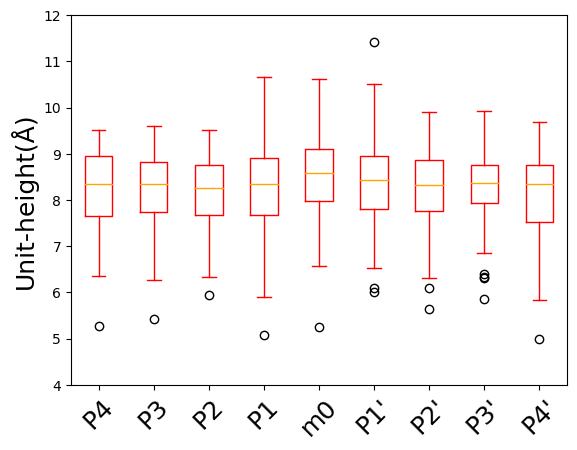

In [113]:
# xlabel=["u4","u3","u2","u1","m0","u1'","u2'","u3'","u4'"]
# plt.title("severe nonlethal mutation dataset")
plt.ylim(4,12)
plt.boxplot(unhei_severe_nonlethal, boxprops=dict(color="red"),medianprops=dict(color="orange"),  
                   whiskerprops=dict(color="red"),  
                   capprops=dict(color="red"))
plt.xticks(ticks=range(1, len(xlabel) + 1), labels=xlabel, rotation=45, fontsize=18)
plt.ylabel('Unit-height(Å)', fontsize=18)

(array([ 4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.]),
 [Text(0, 4.0, '4'),
  Text(0, 5.0, '5'),
  Text(0, 6.0, '6'),
  Text(0, 7.0, '7'),
  Text(0, 8.0, '8'),
  Text(0, 9.0, '9'),
  Text(0, 10.0, '10'),
  Text(0, 11.0, '11'),
  Text(0, 12.0, '12')])

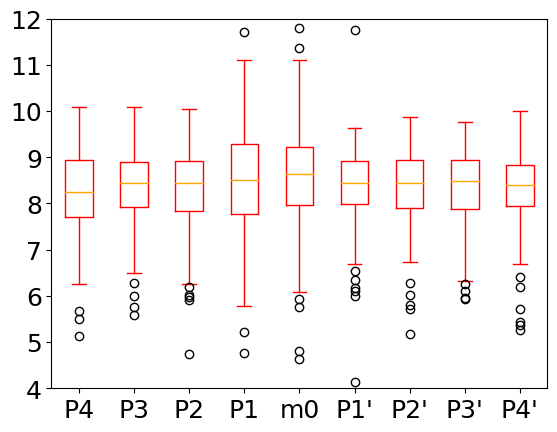

In [115]:
# xlabel=["u4","u3","u2","u1","m0","u1'","u2'","u3'","u4'"]
# plt.title("moderate mutation dataset")
plt.ylim(4,12)
plt.boxplot(unhei_moderate, boxprops=dict(color="red"),medianprops=dict(color="orange"),  
                   whiskerprops=dict(color="red"),  
                   capprops=dict(color="red"))
plt.xticks(ticks=range(1, len(xlabel) + 1), labels=xlabel, fontsize=18)
plt.yticks(fontsize=18)

Text(0, 0.5, 'Unit-height(Å)')

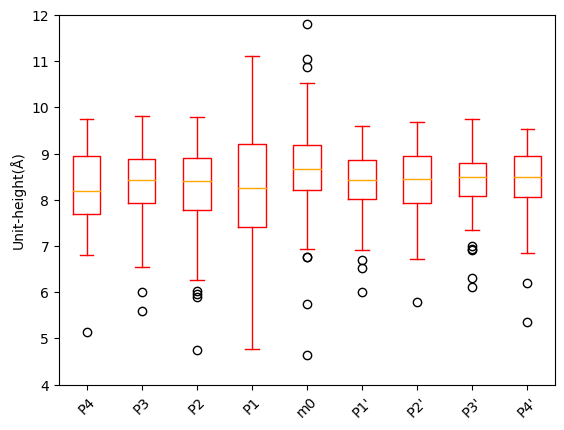

In [72]:
# xlabel=["u4","u3","u2","u1","m0","u1'","u2'","u3'","u4'"]
# plt.title("moderate lethal mutation dataset")
plt.ylim(4,12)
plt.boxplot(unhei_moderate_lethal, boxprops=dict(color="red"),medianprops=dict(color="orange"),  
                   whiskerprops=dict(color="red"),  
                   capprops=dict(color="red"))
plt.xticks(ticks=range(1, len(xlabel) + 1), labels=xlabel, rotation=45, fontsize=10)
plt.ylabel('Unit-height(Å)', fontsize=10)

Text(0, 0.5, 'Unit-height(Å)')

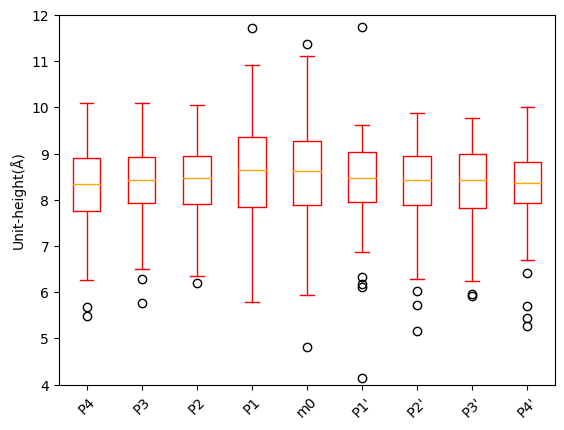

In [73]:
# xlabel=["u4","u3","u2","u1","m0","u1'","u2'","u3'","u4'"]
# plt.title("moderate nonlethal mutation dataset")
plt.ylim(4,12)
plt.boxplot(unhei_moderate_nonlethal, boxprops=dict(color="red"),medianprops=dict(color="orange"),  
                   whiskerprops=dict(color="red"),  
                   capprops=dict(color="red"))
plt.xticks(ticks=range(1, len(xlabel) + 1), labels=xlabel, rotation=45, fontsize=10)
plt.ylabel('Unit-height(Å)', fontsize=10)

(array([ 4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.]),
 [Text(0, 4.0, '4'),
  Text(0, 5.0, '5'),
  Text(0, 6.0, '6'),
  Text(0, 7.0, '7'),
  Text(0, 8.0, '8'),
  Text(0, 9.0, '9'),
  Text(0, 10.0, '10'),
  Text(0, 11.0, '11'),
  Text(0, 12.0, '12')])

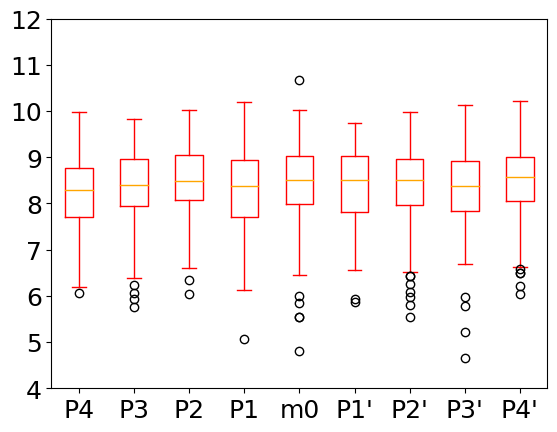

In [117]:
# xlabel=["u4","u3","u2","u1","m0","u1'","u2'","u3'","u4'"]
# plt.title("mild mutation dataset")
plt.ylim(4,12)
plt.boxplot(unhei_mild, boxprops=dict(color="red"),medianprops=dict(color="orange"),  
                   whiskerprops=dict(color="red"),  
                   capprops=dict(color="red"))
plt.xticks(ticks=range(1, len(xlabel) + 1), labels=xlabel, fontsize=18)
plt.yticks(fontsize=18)

Text(0, 0.5, 'Unit-height(Å)')

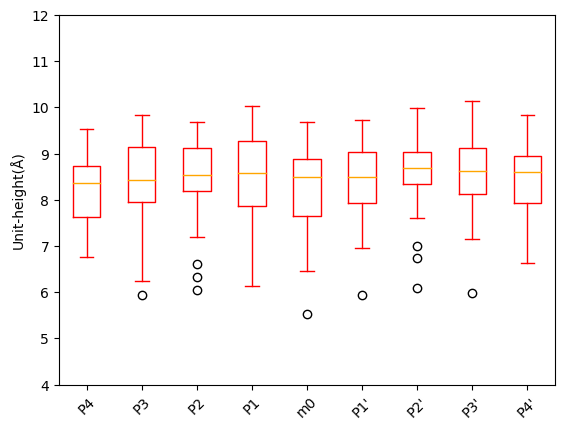

In [75]:
# xlabel=["u4","u3","u2","u1","m0","u1'","u2'","u3'","u4'"]
# plt.title("mild lethal mutation dataset")
plt.ylim(4,12)
plt.boxplot(unhei_mild_lethal, boxprops=dict(color="red"),medianprops=dict(color="orange"),  
                   whiskerprops=dict(color="red"),  
                   capprops=dict(color="red"))
plt.xticks(ticks=range(1, len(xlabel) + 1), labels=xlabel, rotation=45, fontsize=10)
plt.ylabel('Unit-height(Å)', fontsize=10)

Text(0, 0.5, 'Unit-height(Å)')

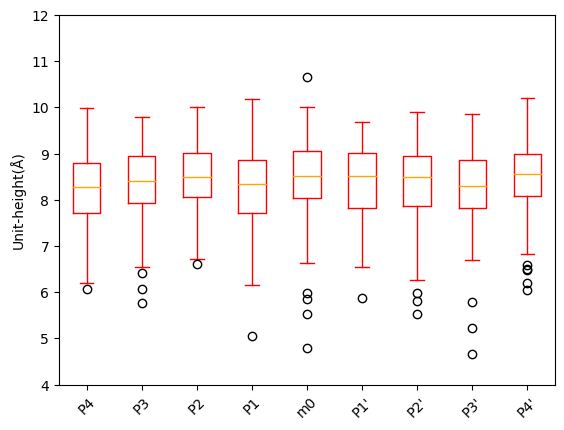

In [76]:
# xlabel=["u4","u3","u2","u1","m0","u1'","u2'","u3'","u4'"]
# plt.title("mild nonlethal mutation dataset")
plt.ylim(4,12)
plt.boxplot(unhei_mild_nonlethal, boxprops=dict(color="red"),medianprops=dict(color="orange"),  
                   whiskerprops=dict(color="red"),  
                   capprops=dict(color="red"))
plt.xticks(ticks=range(1, len(xlabel) + 1), labels=xlabel, rotation=45, fontsize=10)
plt.ylabel('Unit-height(Å)', fontsize=10)

(array([-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.]),
 [Text(0, -4.0, '−4'),
  Text(0, -3.0, '−3'),
  Text(0, -2.0, '−2'),
  Text(0, -1.0, '−1'),
  Text(0, 0.0, '0'),
  Text(0, 1.0, '1'),
  Text(0, 2.0, '2'),
  Text(0, 3.0, '3'),
  Text(0, 4.0, '4'),
  Text(0, 5.0, '5')])

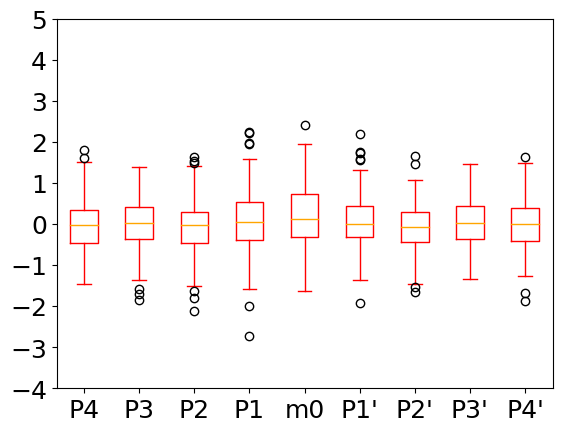

In [119]:
# xlabel=["u4","u3","u2","u1","m0","u1'","u2'","u3'","u4'"]
# plt.title("severe mutation dataset")
plt.ylim(-4,5)
plt.boxplot(unhei_diff_severe, boxprops=dict(color="red"),medianprops=dict(color="orange"),  
                   whiskerprops=dict(color="red"),  
                   capprops=dict(color="red"))
plt.xticks(ticks=range(1, len(xlabel) + 1), labels=xlabel, fontsize=18)
plt.yticks(fontsize=18)

Text(0, 0.5, 'Unit-height difference(Å)')

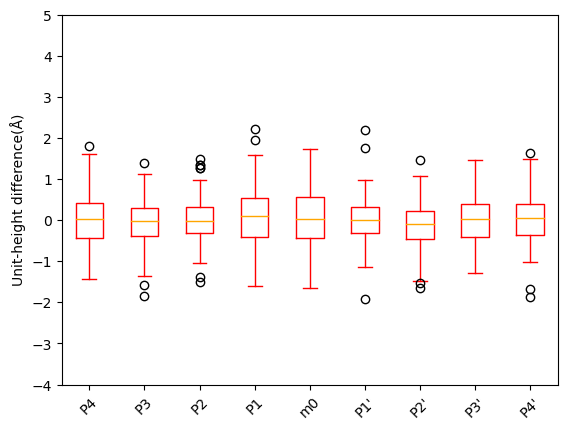

In [78]:
# xlabel=["u4","u3","u2","u1","m0","u1'","u2'","u3'","u4'"]
# plt.title("severe lethal mutation dataset")
plt.ylim(-4,5)
plt.boxplot(unhei_diff_severe_lethal, boxprops=dict(color="red"),medianprops=dict(color="orange"),  
                   whiskerprops=dict(color="red"),  
                   capprops=dict(color="red"))
plt.xticks(ticks=range(1, len(xlabel) + 1), labels=xlabel, rotation=45, fontsize=10)
plt.ylabel('Unit-height difference(Å)', fontsize=10)

Text(0, 0.5, 'Unit-height difference(Å)')

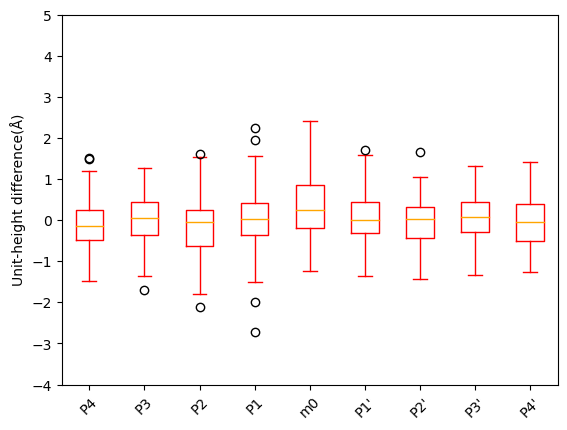

In [79]:
# xlabel=["u4","u3","u2","u1","m0","u1'","u2'","u3'","u4'"]
# plt.title("severe nonlethal mutation dataset")
plt.ylim(-4,5)
plt.boxplot(unhei_diff_severe_nonlethal, boxprops=dict(color="red"),medianprops=dict(color="orange"),  
                   whiskerprops=dict(color="red"),  
                   capprops=dict(color="red"))
plt.xticks(ticks=range(1, len(xlabel) + 1), labels=xlabel, rotation=45, fontsize=10)
plt.ylabel('Unit-height difference(Å)', fontsize=10)

(array([-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.]),
 [Text(0, -4.0, '−4'),
  Text(0, -3.0, '−3'),
  Text(0, -2.0, '−2'),
  Text(0, -1.0, '−1'),
  Text(0, 0.0, '0'),
  Text(0, 1.0, '1'),
  Text(0, 2.0, '2'),
  Text(0, 3.0, '3'),
  Text(0, 4.0, '4'),
  Text(0, 5.0, '5')])

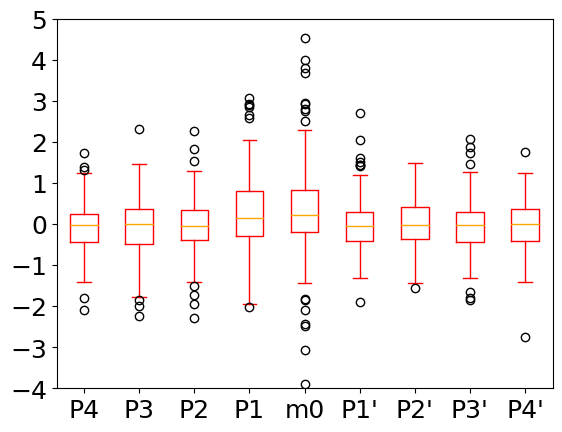

In [121]:
# xlabel=["u4","u3","u2","u1","m0","u1'","u2'","u3'","u4'"]
# plt.title("moderate mutation dataset")
plt.ylim(-4,5)
plt.boxplot(unhei_diff_moderate, boxprops=dict(color="red"),medianprops=dict(color="orange"),  
                   whiskerprops=dict(color="red"),  
                   capprops=dict(color="red"))
plt.xticks(ticks=range(1, len(xlabel) + 1), labels=xlabel, fontsize=18)
plt.yticks(fontsize=18)

Text(0, 0.5, 'Unit-height difference(Å)')

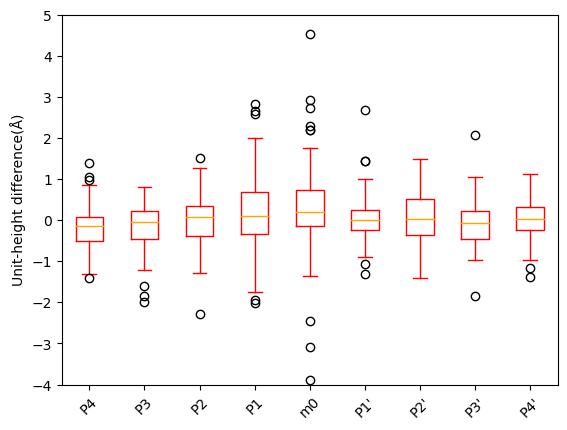

In [81]:
# xlabel=["u4","u3","u2","u1","m0","u1'","u2'","u3'","u4'"]
# plt.title("moderate lethal mutation dataset")
plt.ylim(-4,5)
plt.boxplot(unhei_diff_moderate_lethal, boxprops=dict(color="red"),medianprops=dict(color="orange"),  
                   whiskerprops=dict(color="red"),  
                   capprops=dict(color="red"))
plt.xticks(ticks=range(1, len(xlabel) + 1), labels=xlabel, rotation=45, fontsize=10)
plt.ylabel('Unit-height difference(Å)', fontsize=10)

Text(0, 0.5, 'Unit-height difference(Å)')

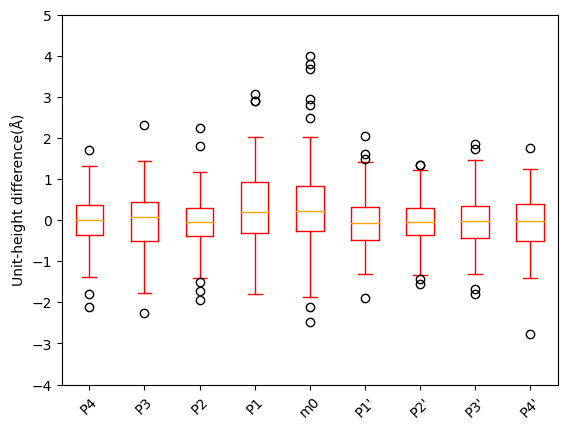

In [82]:
# xlabel=["u4","u3","u2","u1","m0","u1'","u2'","u3'","u4'"]
# plt.title("moderate nonlethal mutation dataset")
plt.ylim(-4,5)
plt.boxplot(unhei_diff_moderate_nonlethal, boxprops=dict(color="red"),medianprops=dict(color="orange"),  
                   whiskerprops=dict(color="red"),  
                   capprops=dict(color="red"))
plt.xticks(ticks=range(1, len(xlabel) + 1), labels=xlabel, rotation=45, fontsize=10)
plt.ylabel('Unit-height difference(Å)', fontsize=10)

(array([-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.]),
 [Text(0, -4.0, '−4'),
  Text(0, -3.0, '−3'),
  Text(0, -2.0, '−2'),
  Text(0, -1.0, '−1'),
  Text(0, 0.0, '0'),
  Text(0, 1.0, '1'),
  Text(0, 2.0, '2'),
  Text(0, 3.0, '3'),
  Text(0, 4.0, '4'),
  Text(0, 5.0, '5')])

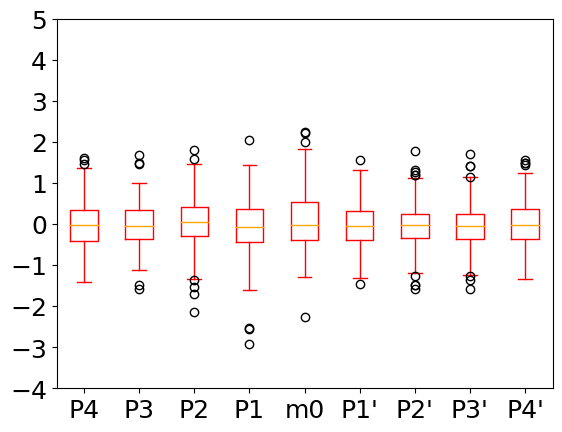

In [123]:
# xlabel=["u4","u3","u2","u1","m0","u1'","u2'","u3'","u4'"]
# plt.title("mild mutation dataset")
plt.ylim(-4,5)
plt.boxplot(unhei_diff_mild, boxprops=dict(color="red"),medianprops=dict(color="orange"),  
                   whiskerprops=dict(color="red"),  
                   capprops=dict(color="red"))
plt.xticks(ticks=range(1, len(xlabel) + 1), labels=xlabel, fontsize=18)
plt.yticks(fontsize=18)

Text(0, 0.5, 'Unit-height difference(Å)')

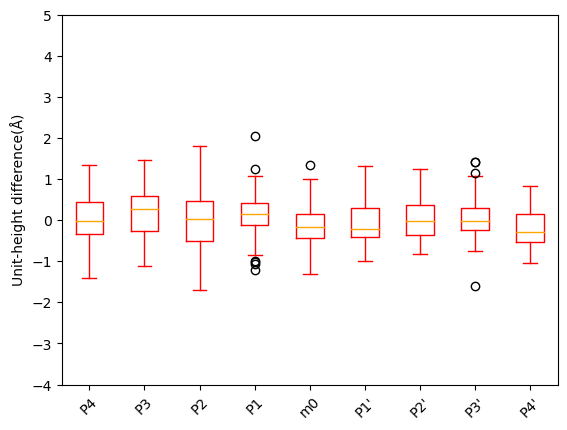

In [84]:
# xlabel=["u4","u3","u2","u1","m0","u1'","u2'","u3'","u4'"]
# plt.title("mild lethal mutation dataset")
plt.ylim(-4,5)
plt.boxplot(unhei_diff_mild_lethal, boxprops=dict(color="red"),medianprops=dict(color="orange"),  
                   whiskerprops=dict(color="red"),  
                   capprops=dict(color="red"))
plt.xticks(ticks=range(1, len(xlabel) + 1), labels=xlabel, rotation=45, fontsize=10)
plt.ylabel('Unit-height difference(Å)', fontsize=10)

Text(0, 0.5, 'Unit-height difference(Å)')

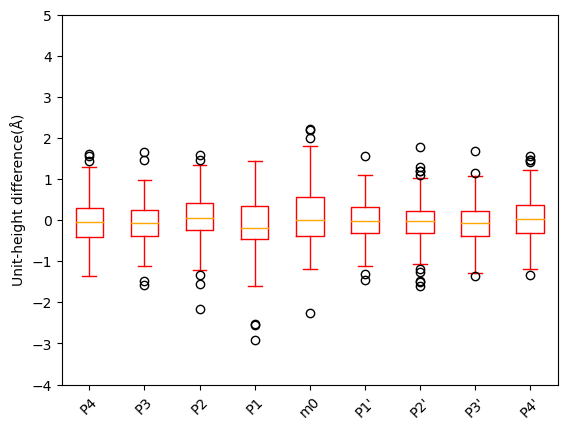

In [85]:
# xlabel=["u4","u3","u2","u1","m0","u1'","u2'","u3'","u4'"]
# plt.title("mild nonlethal mutation dataset")
plt.ylim(-4,5)
plt.boxplot(unhei_diff_mild_nonlethal, boxprops=dict(color="red"),medianprops=dict(color="orange"),  
                   whiskerprops=dict(color="red"),  
                   capprops=dict(color="red"))
plt.xticks(ticks=range(1, len(xlabel) + 1), labels=xlabel, rotation=45, fontsize=10)
plt.ylabel('Unit-height difference(Å)', fontsize=10)

[]


Text(0, 0.5, 'Unit-height(Å)')

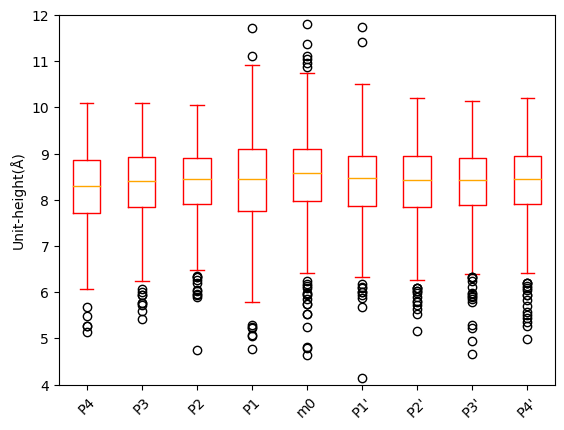

In [86]:
print([x for x in rad[0] if x > 10])
# xlabel=["u4","u3","u2","u1","m0","u1'","u2'","u3'","u4'"]
# plt.title("full dataset")
plt.ylim(4,12)
plt.boxplot(unhei, boxprops=dict(color="red"),medianprops=dict(color="orange"),  
                   whiskerprops=dict(color="red"),  
                   capprops=dict(color="red"))
plt.xticks(ticks=range(1, len(xlabel) + 1), labels=xlabel, rotation=45, fontsize=10)
plt.ylabel('Unit-height(Å)', fontsize=10)

Text(0, 0.5, 'Unit-height difference(Å)')

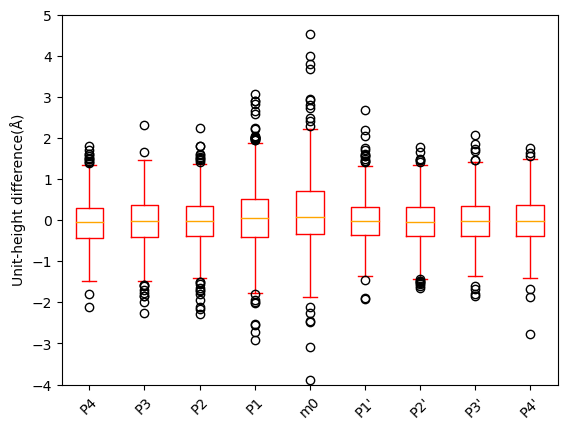

In [87]:
# xlabel=["u4","u3","u2","u1","m0","u1'","u2'","u3'","u4'"]
plt.ylim(-4,5)
# plt.title('full dataset')
plt.boxplot(unhei_diff, boxprops=dict(color="red"),medianprops=dict(color="orange"),  
                   whiskerprops=dict(color="red"),  
                   capprops=dict(color="red"))
plt.xticks(ticks=range(1, len(xlabel) + 1), labels=xlabel, rotation=45, fontsize=10)
plt.ylabel('Unit-height difference(Å)', fontsize=10)

(array([-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.]),
 [Text(0, -4.0, '−4'),
  Text(0, -3.0, '−3'),
  Text(0, -2.0, '−2'),
  Text(0, -1.0, '−1'),
  Text(0, 0.0, '0'),
  Text(0, 1.0, '1'),
  Text(0, 2.0, '2'),
  Text(0, 3.0, '3'),
  Text(0, 4.0, '4'),
  Text(0, 5.0, '5')])

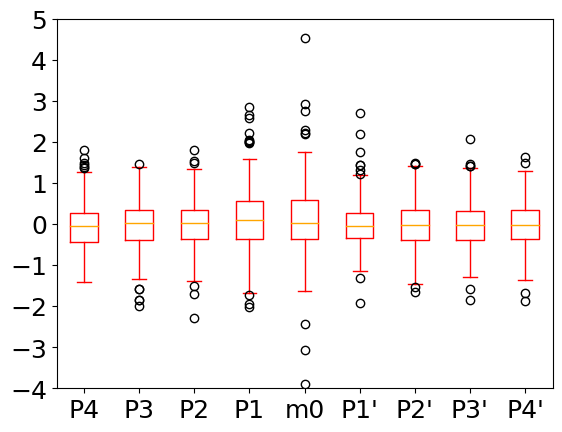

In [109]:
# xlabel=["u4","u3","u2","u1","m0","u1'","u2'","u3'","u4'"]
# plt.title("lethal dataset")
plt.ylim(-4,5)
plt.boxplot(unhei_diff_lethal, boxprops=dict(color="red"),medianprops=dict(color="orange"),  
                   whiskerprops=dict(color="red"),  
                   capprops=dict(color="red"))
plt.xticks(ticks=range(1, len(xlabel) + 1), labels=xlabel, fontsize=18)
plt.yticks(fontsize=18)

(array([-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.]),
 [Text(0, -4.0, '−4'),
  Text(0, -3.0, '−3'),
  Text(0, -2.0, '−2'),
  Text(0, -1.0, '−1'),
  Text(0, 0.0, '0'),
  Text(0, 1.0, '1'),
  Text(0, 2.0, '2'),
  Text(0, 3.0, '3'),
  Text(0, 4.0, '4'),
  Text(0, 5.0, '5')])

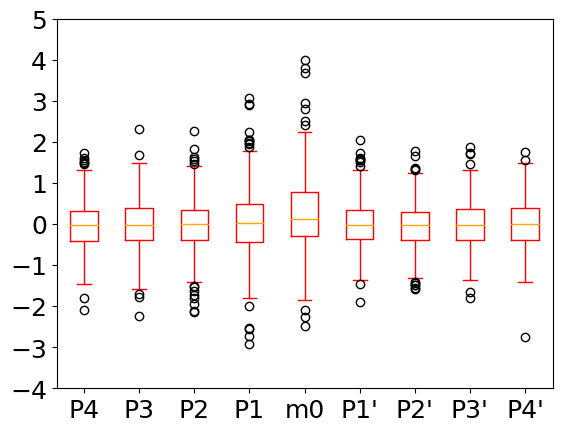

In [110]:
# xlabel=["u4","u3","u2","u1","m0","u1'","u2'","u3'","u4'"]
plt.ylim(-4,5)
# plt.title("nonlethal dataset")
plt.boxplot(unhei_diff_nonlethal, boxprops=dict(color="red"),medianprops=dict(color="orange"),  
                   whiskerprops=dict(color="red"),  
                   capprops=dict(color="red"))
plt.xticks(ticks=range(1, len(xlabel) + 1), labels=xlabel, fontsize=18)
plt.yticks(fontsize=18)

(array([ 4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.]),
 [Text(0, 4.0, '4'),
  Text(0, 5.0, '5'),
  Text(0, 6.0, '6'),
  Text(0, 7.0, '7'),
  Text(0, 8.0, '8'),
  Text(0, 9.0, '9'),
  Text(0, 10.0, '10'),
  Text(0, 11.0, '11'),
  Text(0, 12.0, '12')])

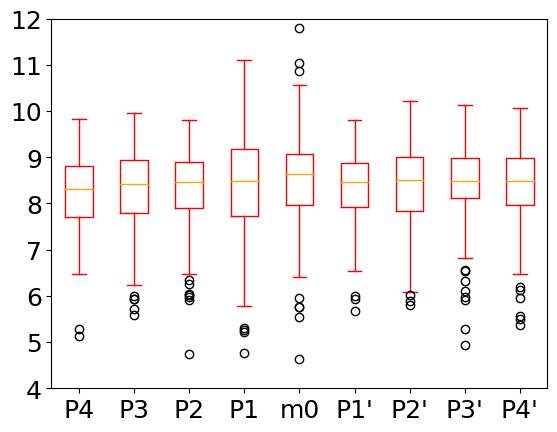

In [101]:
# xlabel=["u4","u3","u2","u1","m0","u1'","u2'","u3'","u4'"]
plt.ylim(4,12)
# plt.title("lethal dataset")
plt.boxplot(unhei_lethal, boxprops=dict(color="red"),medianprops=dict(color="orange"),  
                   whiskerprops=dict(color="red"),  
                   capprops=dict(color="red"))
plt.xticks(ticks=range(1, len(xlabel) + 1), labels=xlabel, fontsize=18)
plt.yticks(fontsize=18)
# plt.ylabel('Unit-height(Å)', fontsize=18)
# plt.xlabel('Unit', fontsize=18)

(array([ 4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.]),
 [Text(0, 4.0, '4'),
  Text(0, 5.0, '5'),
  Text(0, 6.0, '6'),
  Text(0, 7.0, '7'),
  Text(0, 8.0, '8'),
  Text(0, 9.0, '9'),
  Text(0, 10.0, '10'),
  Text(0, 11.0, '11'),
  Text(0, 12.0, '12')])

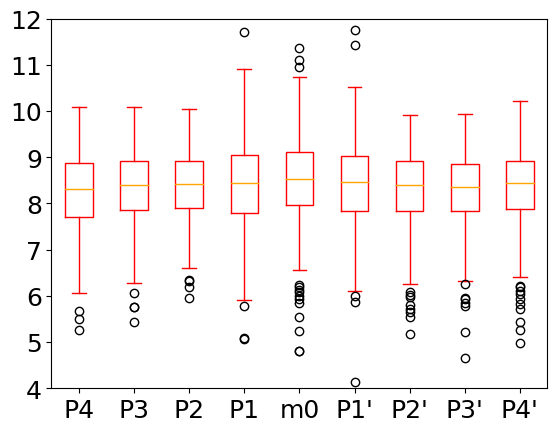

In [105]:
# xlabel=["u4","u3","u2","u1","m0","u1'","u2'","u3'","u4'"]
plt.ylim(4,12)
# plt.title("nonlethal dataset")
plt.boxplot(unhei_nonlethal, boxprops=dict(color="red"),medianprops=dict(color="orange"),  
                   whiskerprops=dict(color="red"),  
                   capprops=dict(color="red"))
# plt.xticks(ticks=range(1, len(xlabel) + 1), labels=xlabel, rotation=45, fontsize=10)
plt.xticks(ticks=range(1, len(xlabel) + 1), labels=xlabel, fontsize=18)
plt.yticks(fontsize=18)

In [92]:
data = pd.DataFrame({
    'alpha12': alpha12,
    'triplet_number': triplet_number,
    'lethality': lethal,
    'mutation_name': mutation_name,
    'radius x-4':rad[0],
    'radius x-3':rad[1],
    'radius x-2':rad[2],
    'radius x-1':rad[3],
    'radius m0':rad[4],
    'radius x+1':rad[5],
    'radius x+2':rad[6],
    'radius x+3':rad[7],
    'radius x+4':rad[8],
    'radius diff x-4':rad_diff[0],
    'radius diff x-3':rad_diff[1],
    'radius diff x-2':rad_diff[2],
    'radius diff x-1':rad_diff[3],
    'radius diff m0':rad_diff[4],
    'radius diff x+1':rad_diff[5],
    'radius diff x+2':rad_diff[6],
    'radius diff x+3':rad_diff[7],
    'radius diff x+4':rad_diff[8],
    'unit height  x-4':unhei[0],
    'unit height  x-3':unhei[1],
    'unit height  x-2':unhei[2],
    'unit height  x-1':unhei[3],
    'unit height  m0':unhei[4],
    'unit height  x+1':unhei[5],
    'unit height  x+2':unhei[6],
    'unit height  x+3':unhei[7],
    'unit height  x+4':unhei[8],
    'unit height diff x-4':unhei_diff[0],
    'unit height diff x-3':unhei_diff[1],
    'unit height diff x-2':unhei_diff[2],
    'unit height diff x-1':unhei_diff[3],
    'unit height diff m0':unhei_diff[4],
    'unit height diff x+1':unhei_diff[5],
    'unit height diff x+2':unhei_diff[6],
    'unit height diff x+3':unhei_diff[7],
    'unit height diff x+4':unhei_diff[8],
})
all_type = ['ARG', 'SER', 'GLU', 'VAL', 'TRP', 'ALA', 'ASP', 'PRO', 'CYS']
data['alpha_type'] = data['alpha12'].map({1: 'alpha1', 2: 'alpha2'})
# print(data)
data['lethality'] = data['lethality'].map({1: 'nonlethal', 0: 'lethal'})
data['mutation_name'] = pd.Categorical(data['mutation_name'], categories=all_type, ordered=True)
print(data)
def plot_scatter(data, column_prefix, y_label, title_prefix):
    # Create a figure with multiple subplots
    fig, axes = plt.subplots(3, 3, figsize=(18, 15))
    axes = axes.flatten()
    
    unit_labels = ['x-4', 'x-3', 'x-2', 'x-1', 'm0', 'x+1', 'x+2', 'x+3', 'x+4']
    
    # Define a custom color palette
    palette = sns.color_palette("bright")
    
    for i, unit in enumerate(unit_labels):
        col_name = f'{column_prefix} {unit}'
        ax = axes[i]
        sns.scatterplot(
            data=data, 
            x='triplet_number', 
            y=col_name, 
            hue='alpha12', 
            style='lethality', 
            ax=ax, 
            palette=palette,
            alpha=0.7,  # Adjust the transparency to make points brighter
            edgecolor='k',  # Add edge color for better visibility
            linewidth=0.5   # Adjust the width of the edges
        )
        ax.set_title(f'{title_prefix} ({unit})')
        ax.set_xlabel('Mutation Position')
        ax.set_ylabel(y_label)
    
    plt.tight_layout()
    plt.show()

     alpha12  triplet_number  lethality mutation_name  radius x-4  radius x-3  \
0          1               5  nonlethal           ALA    7.331669    5.627629   
1          1               5  nonlethal           ASP    6.028889    7.709805   
2          1               7  nonlethal           CYS    7.018995    5.280311   
3          1               7  nonlethal           SER    6.331588    5.566695   
4          1               7  nonlethal           ASP    7.440241    4.654155   
..       ...             ...        ...           ...         ...         ...   
582        2             305     lethal           ASP    4.255088    3.476587   
583        2             312     lethal           ARG    5.818703    4.669919   
584        2             314  nonlethal           ASP    5.876202    4.331583   
585        2             319     lethal           ASP    3.322744    4.783623   
586        2             332  nonlethal           CYS    5.265464    4.047276   

     radius x-2  radius x-1

/tmp/ipykernel_68966/4248309973.py:62: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(
/tmp/ipykernel_68966/4248309973.py:62: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(
/tmp/ipykernel_68966/4248309973.py:62: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(
/tmp/ipykernel_68966/4248309973.py:62: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(
/tmp/ipykernel_68966/4248309973.py:62: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(
/tmp/ipykernel_68966/4248309973.py:62: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(
/tmp/ipykernel_68966/4248309973.py:62: UserWarning: The palette list has more valu

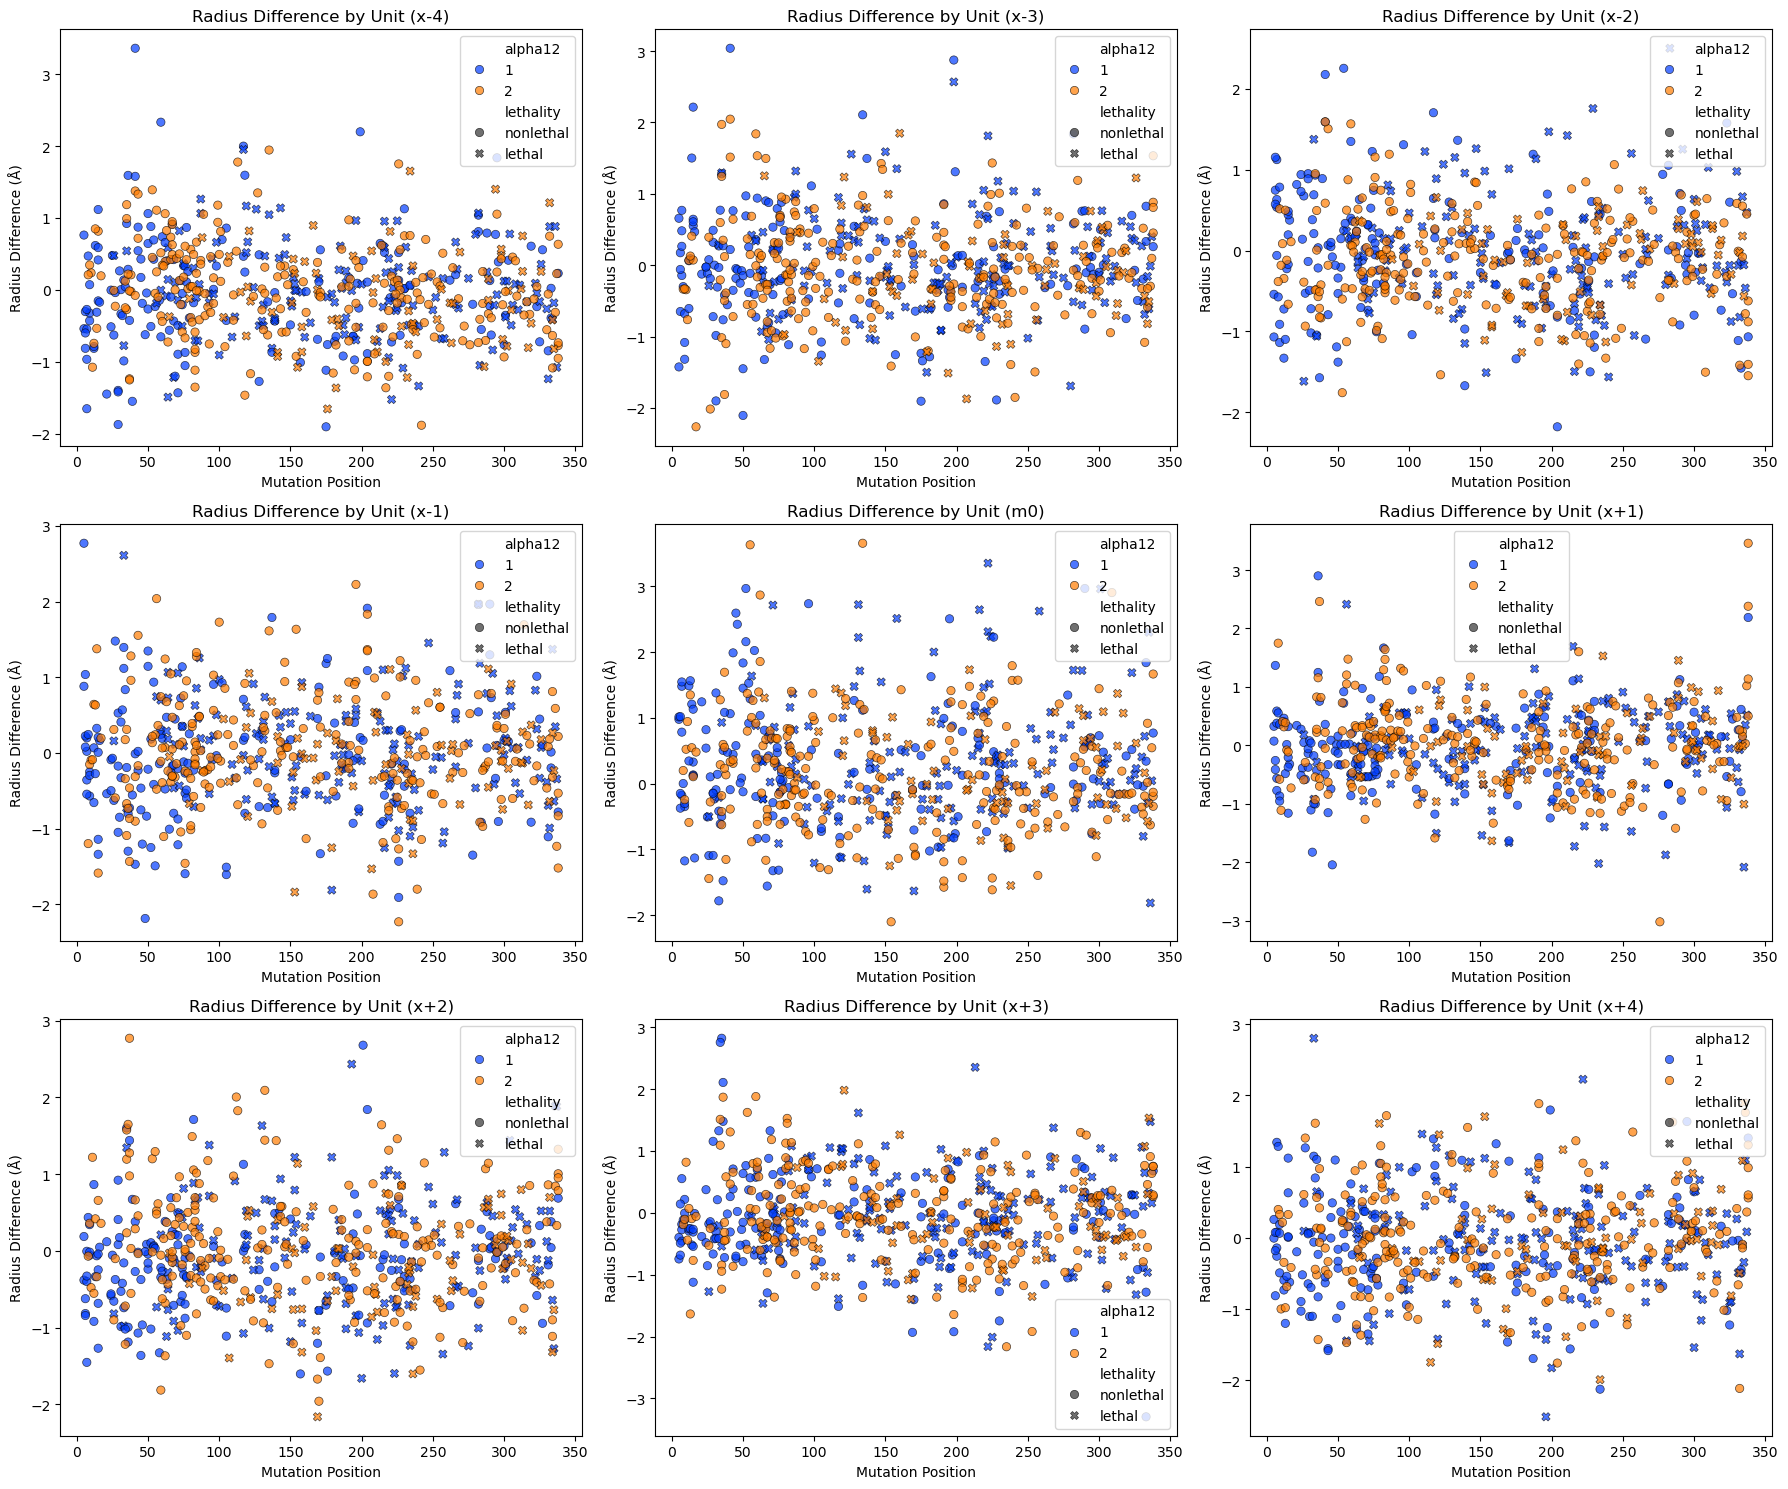

/tmp/ipykernel_68966/4248309973.py:62: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(
/tmp/ipykernel_68966/4248309973.py:62: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(
/tmp/ipykernel_68966/4248309973.py:62: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(
/tmp/ipykernel_68966/4248309973.py:62: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(
/tmp/ipykernel_68966/4248309973.py:62: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(
/tmp/ipykernel_68966/4248309973.py:62: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(
/tmp/ipykernel_68966/4248309973.py:62: UserWarning: The palette list has more valu

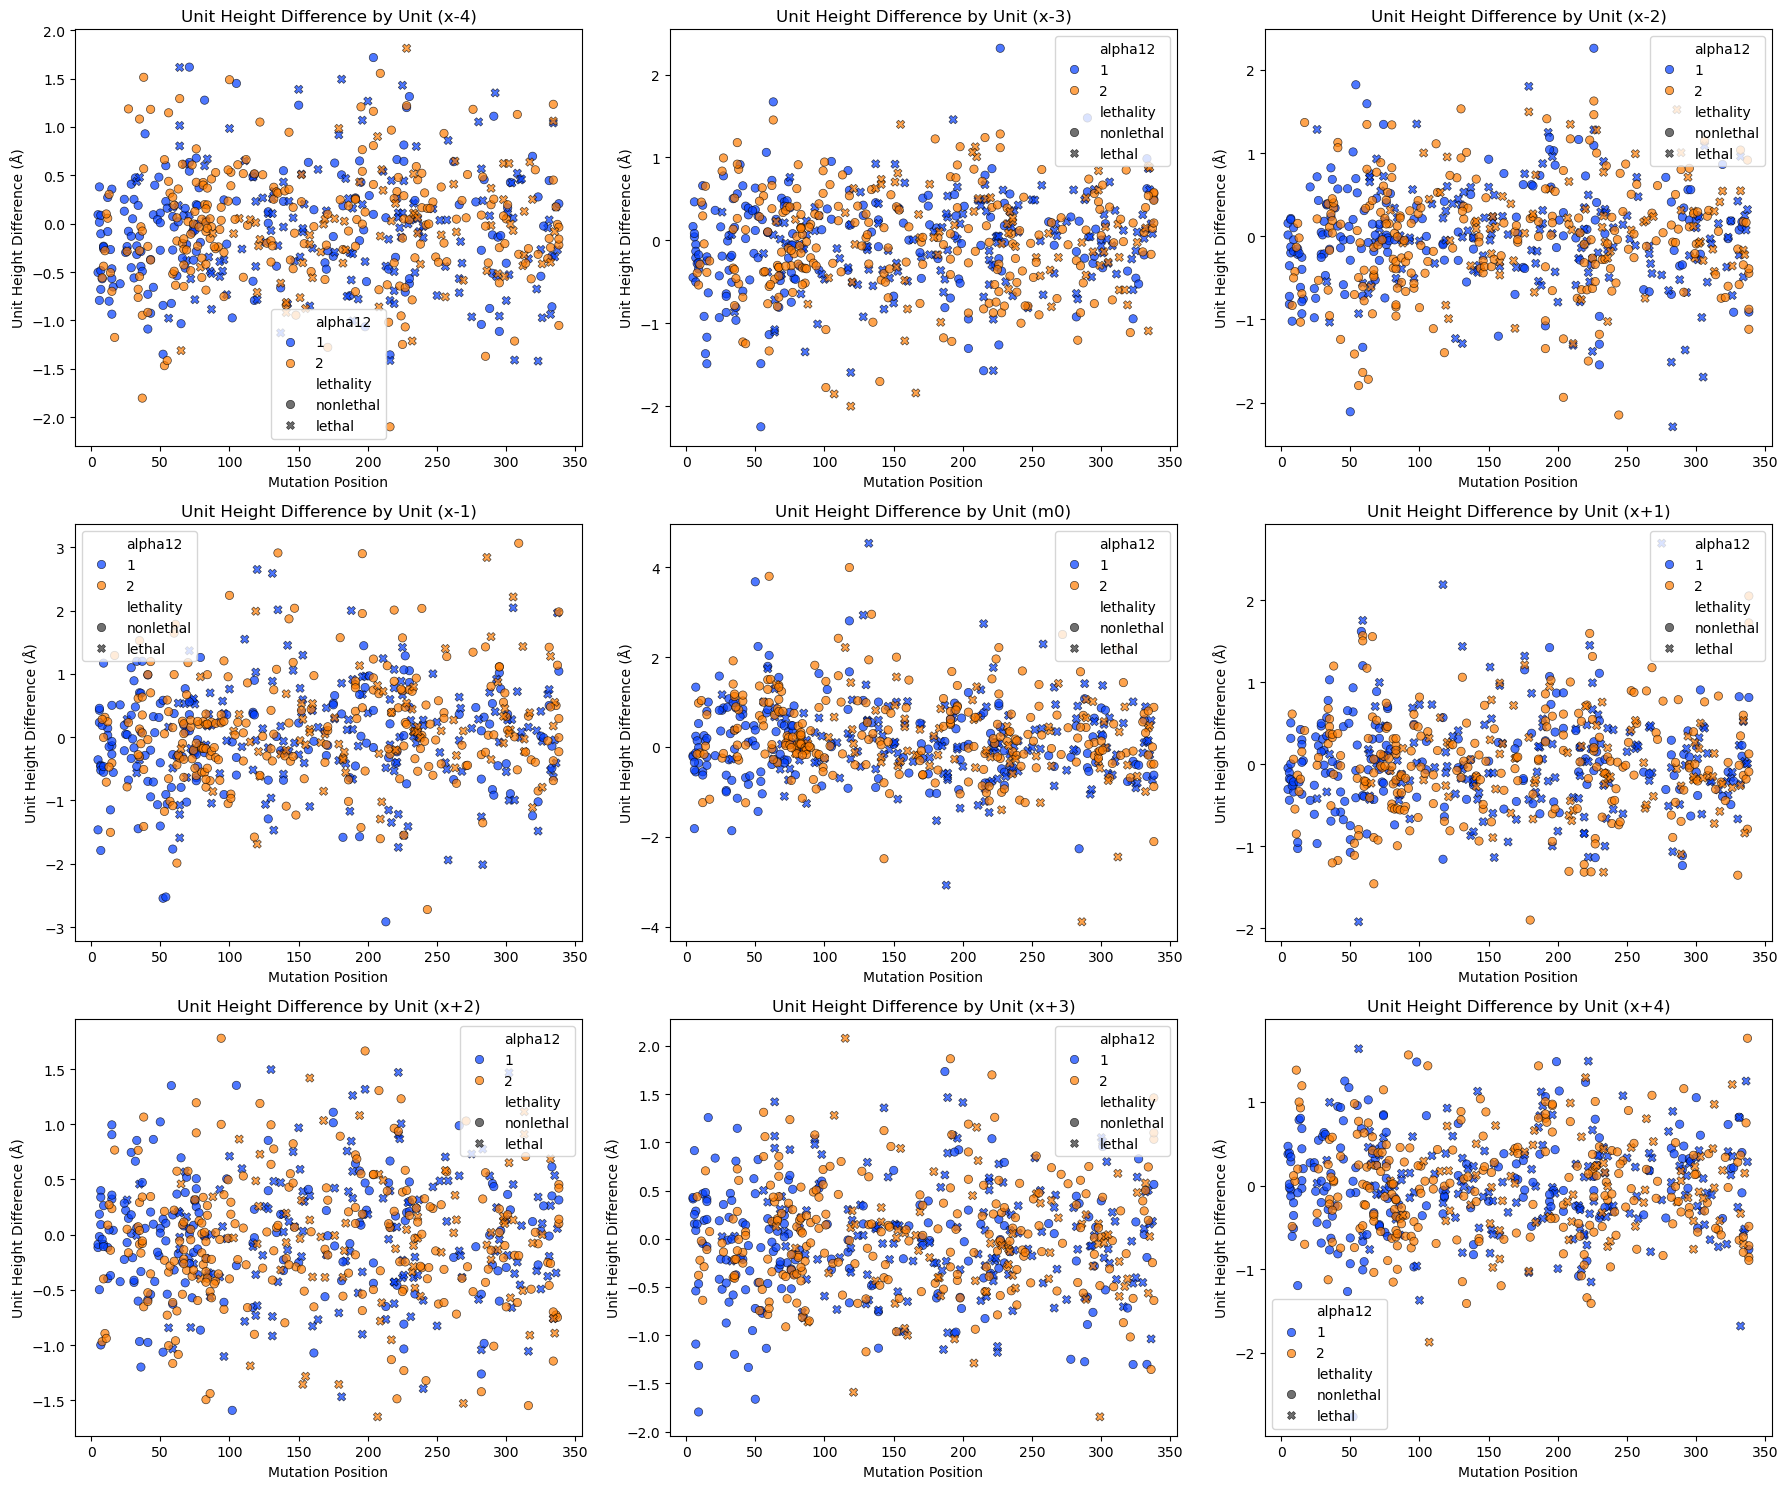

In [93]:
plot_scatter(data, 'radius diff', 'Radius Difference (Å)', 'Radius Difference by Unit')

# Example: Plot unit height differences
plot_scatter(data, 'unit height diff', 'Unit Height Difference (Å)', 'Unit Height Difference by Unit')